# A Genetic Programming Approach for Computer Vision

### Classifying High-level Image Features from Convolutional Layers with an Evolutionary Algorithm

Rui Filipe Martins Monteiro (R20170796) | MSc in Data Science and Advanced Analytics

At the moment, all the code in this Notebook is based on https://github.com/novajon/classy-conv-features

In [3]:
# Imports
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10, cifar100
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
def show_image_classes(images, classes, prefix, suffix=""):
    """Save input images in folder structure and output them

    Parameters
    ----------
    images : array, e.g. numpy array
        images to show

    classes : list
        [not used]

    prefix : string
        prefix to add to output name

    suffix : string
        suffix to add to output name
    """
    for cl in np.unique(y_train):
        for ind, el in enumerate(y_train):
            if el == cl:
                class_pos = ind
                break
        plt.figure()
        plt.imshow(np.uint8(x_train[class_pos]))
        path = "353_Sample_Images/" + prefix + "/"
        if not os.path.exists(path):
            os.makedirs(path)
        plt.savefig(path + input_path.split("/")[1].split("_")[0] + "_" + str(cl) + "_sample_image_" + suffix)

In [5]:
def normalize_production(x):
    """This function is used to normalize instances in production according to saved training set statistics
    - from https://github.com/geifmany/cifar-vgg

    Parameters
    ----------
    X_train : array, e.g., numpy array
        training data set

    X_test : array, e.g., numpy array
        test data set

    Returns: normalized training set and test set according to preset constants.
    """
    #these values produced during first training and are general for the standard cifar10 training set normalization
    mean = 120.707
    std = 64.15
    return (x-mean)/(std+1e-7)

In [6]:
def normalize_data(x_train, x_test):
    """Format the input data by normalizing it

    Parameters
    ----------
    x_train : array, e.g., numpy array
        training data to transform
        
    x_test : array, e.g., numpy array
        test data to transform
    """
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train = normalize_production(x_train)
    x_test = normalize_production(x_test)
    
    return x_train,x_test

In [7]:
def create_MLP_1(input_shape):
    """Create multi-layer perceptron with predefined structure
    This CNN was manually designed by the author.

    Parameters
    ----------
    input_shape : tuple
        shape of the input data
    """
    model = Sequential()
    model.add(Conv2D(128, (3, 3), padding='same',
            input_shape=x_train.shape[1:]))
    model.add(Activation('elu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(Activation('elu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(Activation('elu'))
    model.add(Conv2D(512, (3, 3)))
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('elu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    return model

## Data Exploration

In [8]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
input_path = "351_Data/CIFAR10_filtered/"

In [10]:
num_classes = len(np.unique(y_train))
num_classes

100

In [11]:
treat_data = "normalize"

In [12]:
# Produce a timestamp to attach to future outputs
now = datetime.datetime.now()
prefix = now.strftime("%Y%m%d_%H%M")

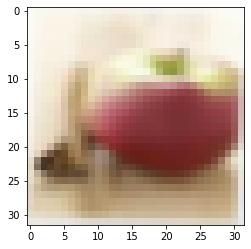

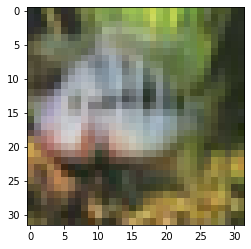

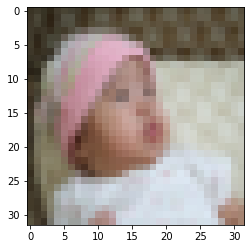

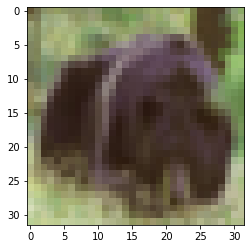

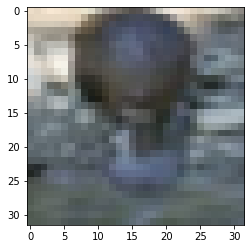

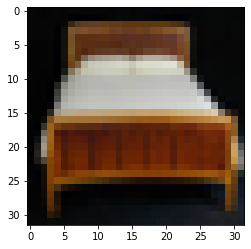

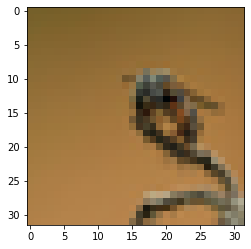

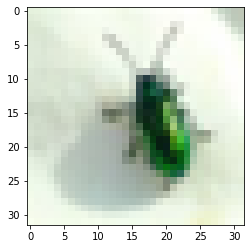

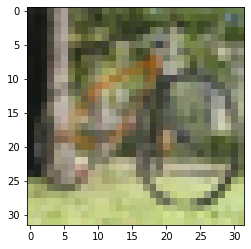

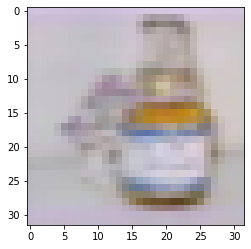

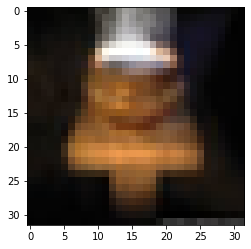

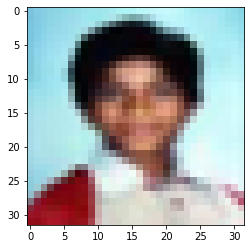

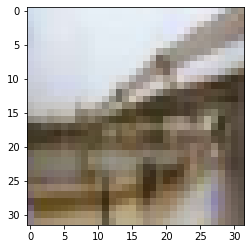

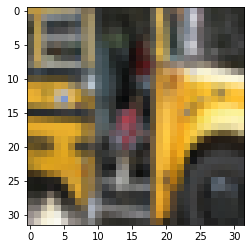

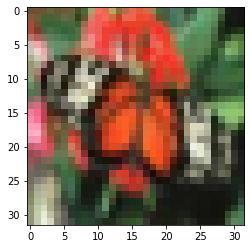

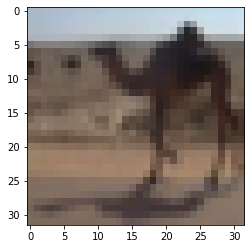

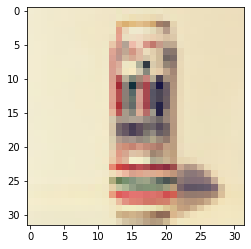

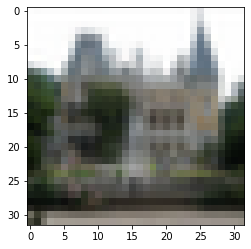

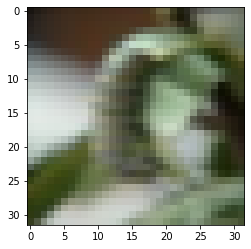

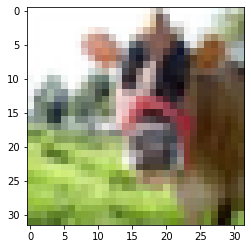

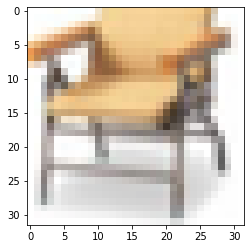

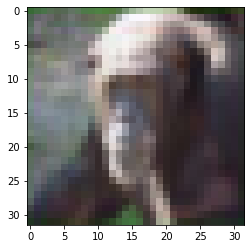

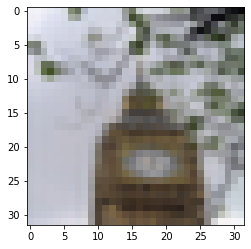

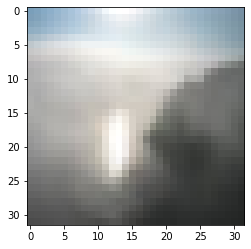

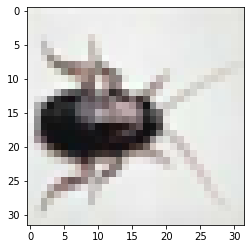

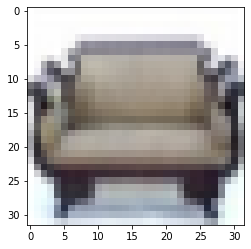

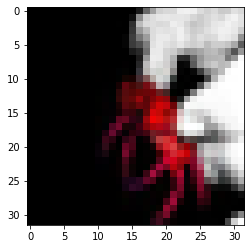

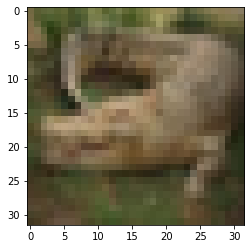

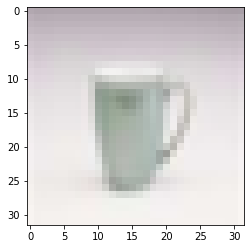

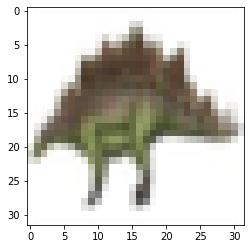

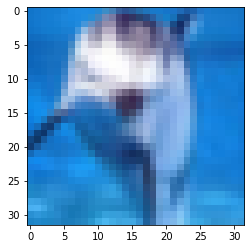

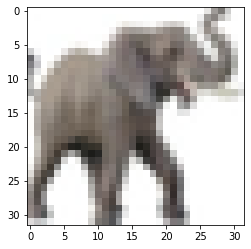

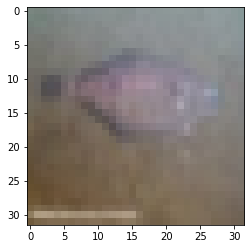

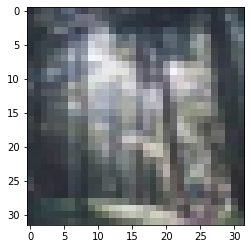

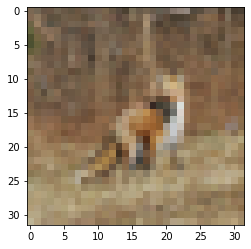

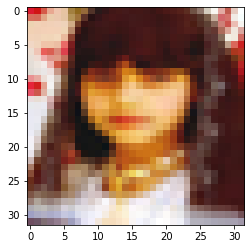

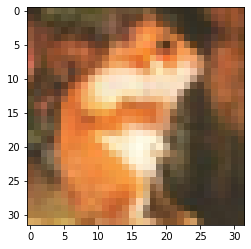

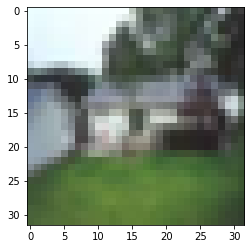

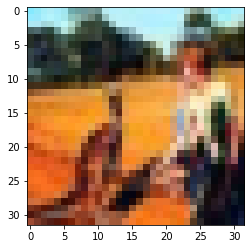

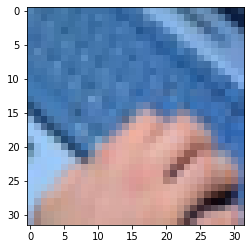

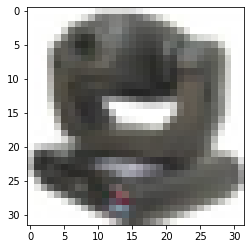

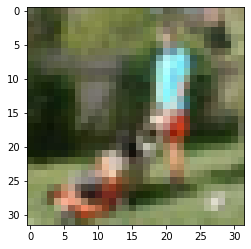

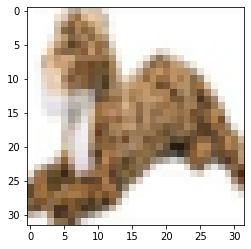

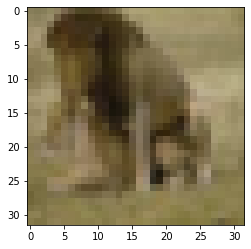

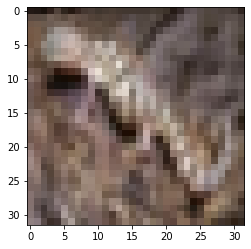

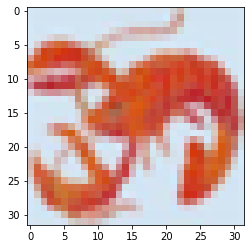

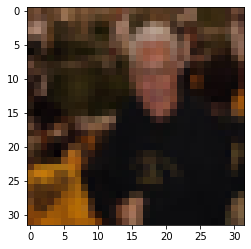

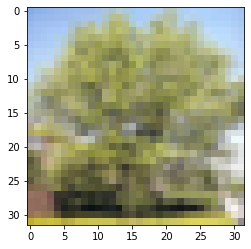

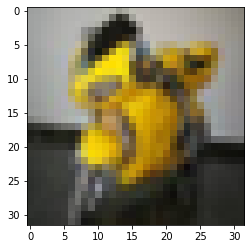

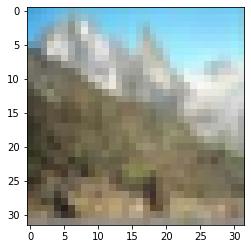

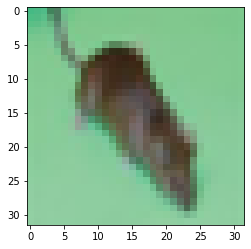

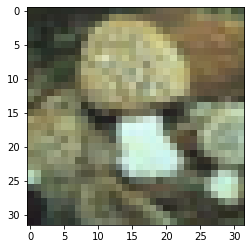

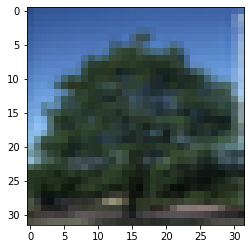

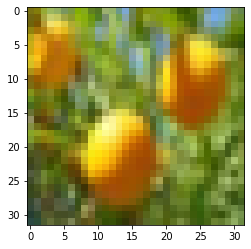

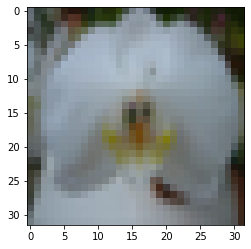

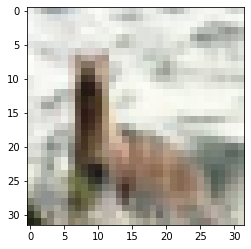

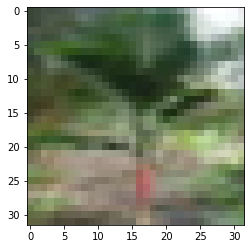

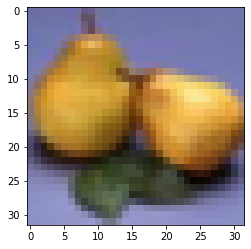

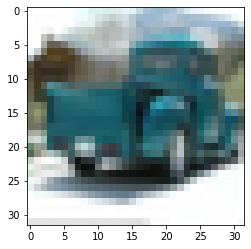

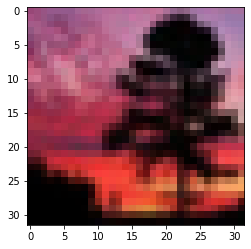

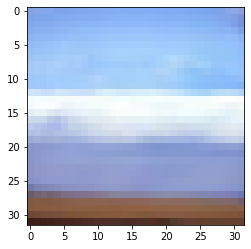

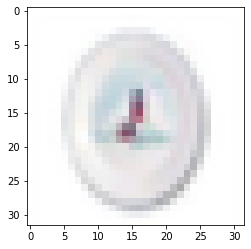

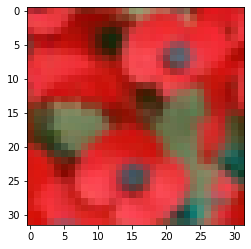

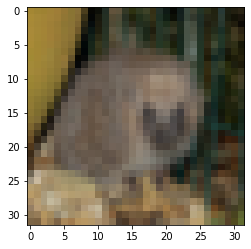

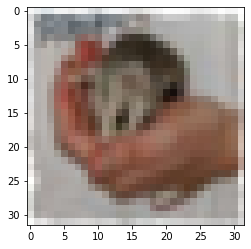

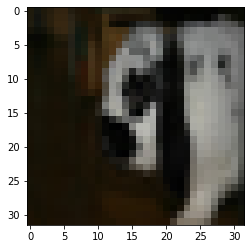

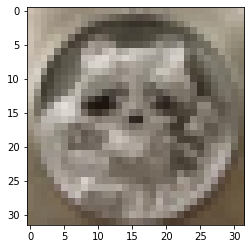

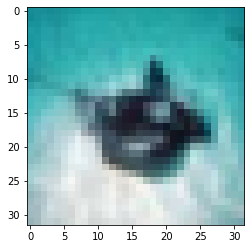

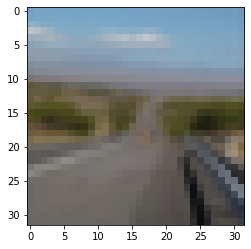

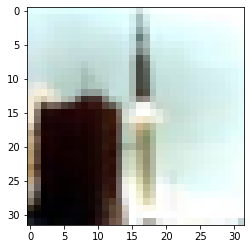

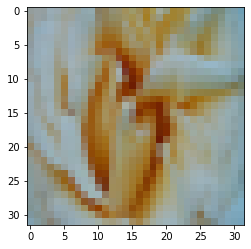

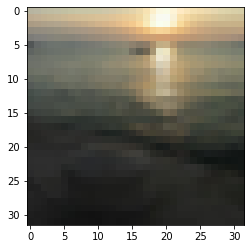

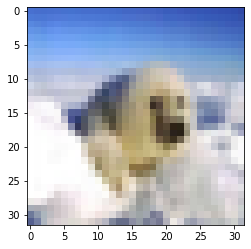

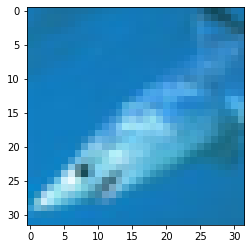

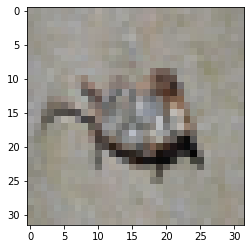

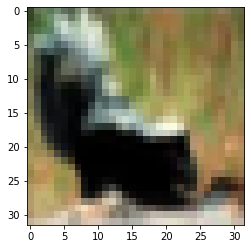

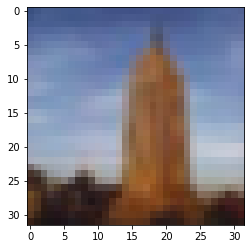

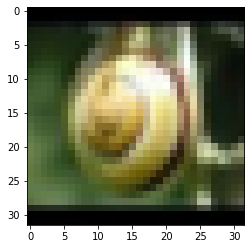

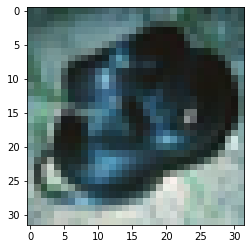

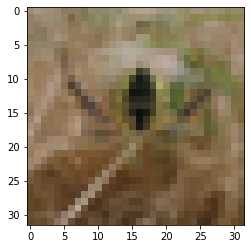

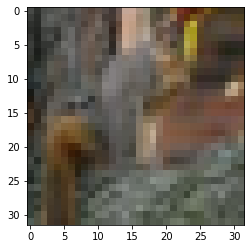

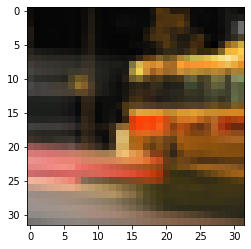

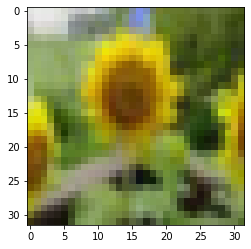

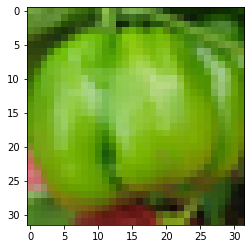

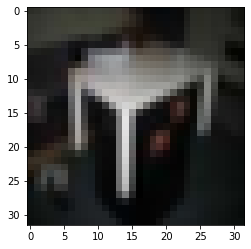

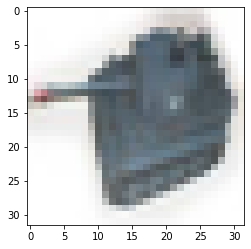

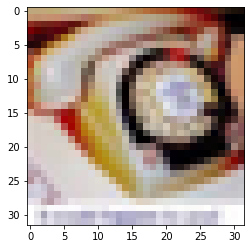

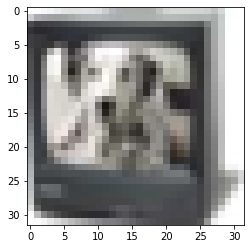

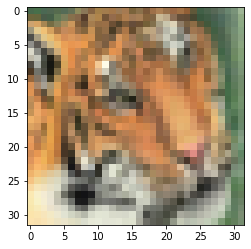

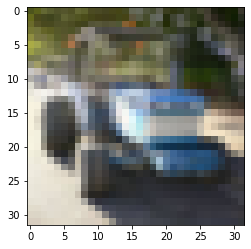

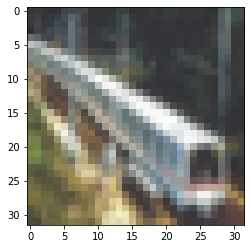

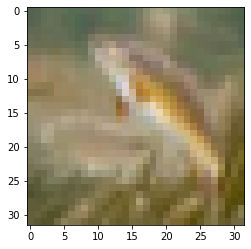

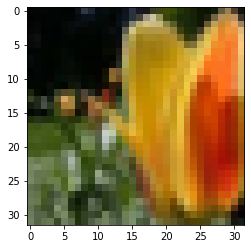

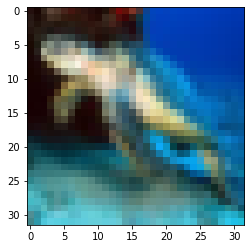

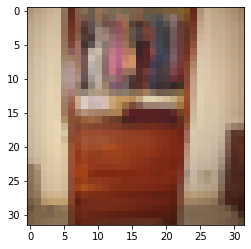

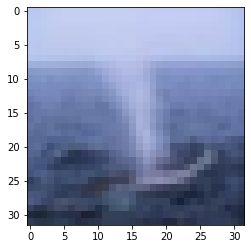

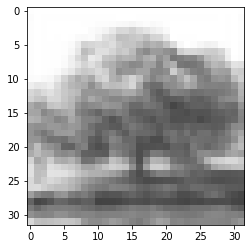

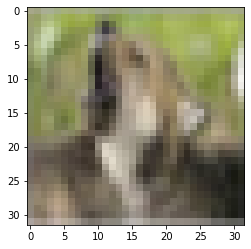

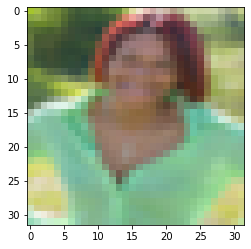

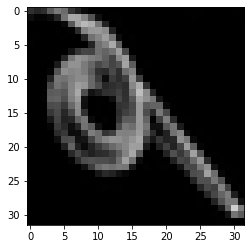

In [13]:
# Show the images to get a visual understanding of the classes
show_image_classes(x_train, y_train, prefix, "raw")

In [14]:
class_n_pos = [ind for ind, el in enumerate(y_train) if el == 30]

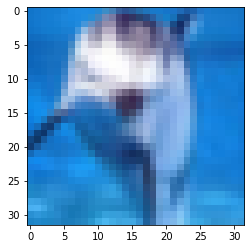

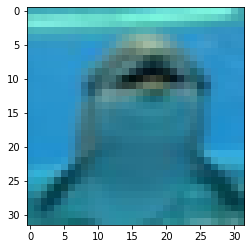

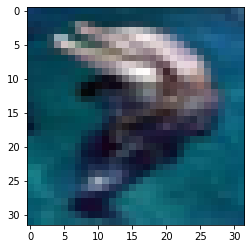

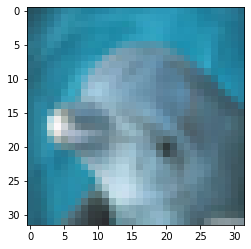

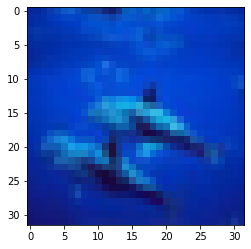

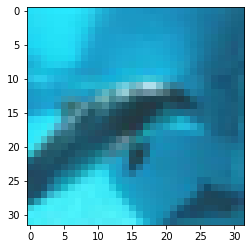

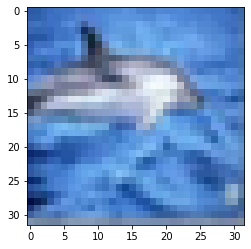

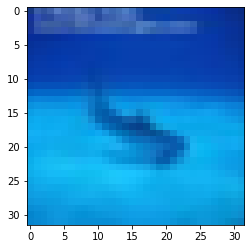

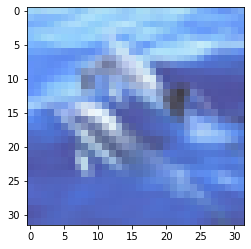

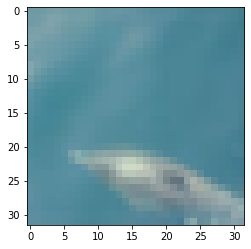

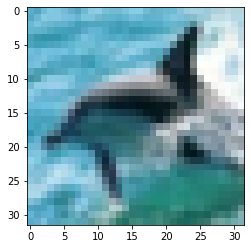

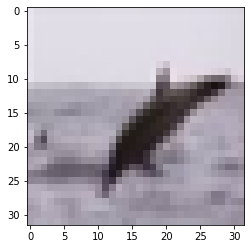

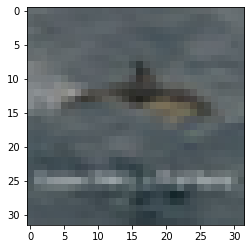

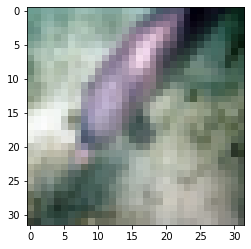

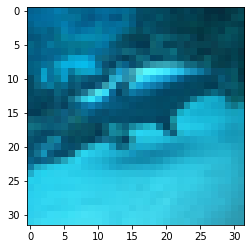

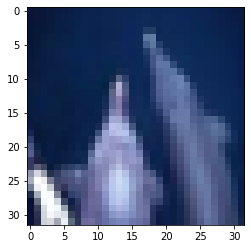

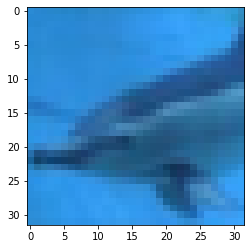

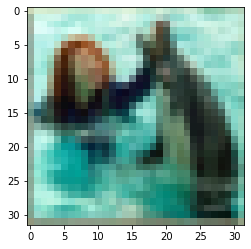

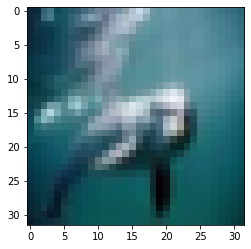

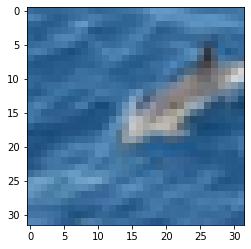

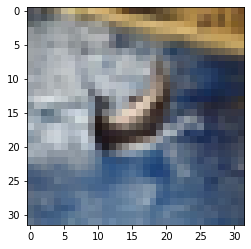

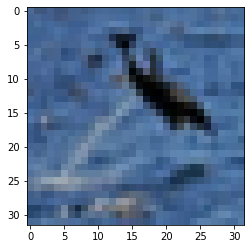

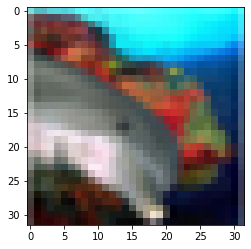

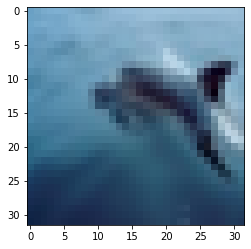

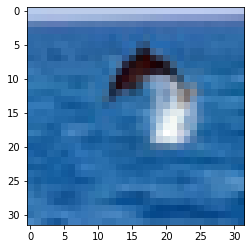

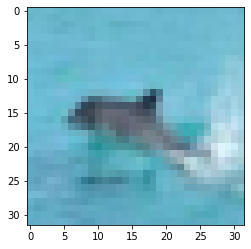

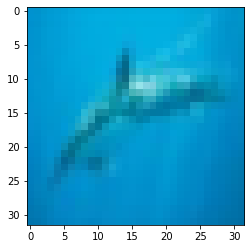

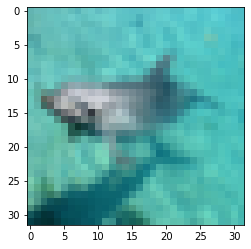

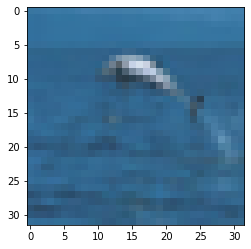

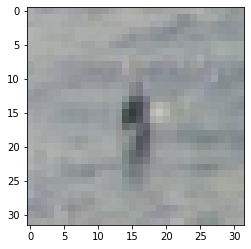

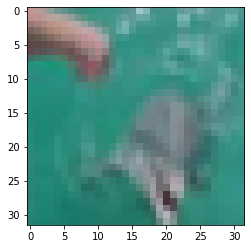

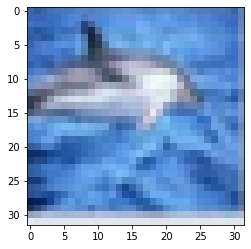

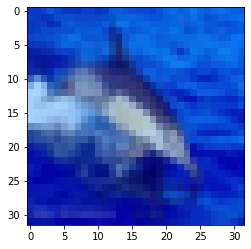

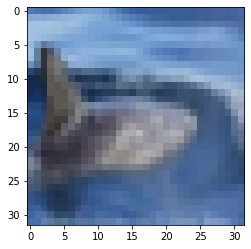

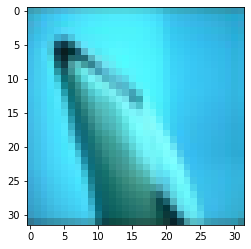

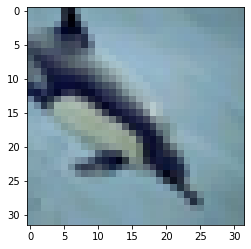

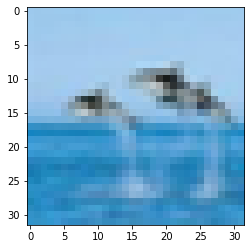

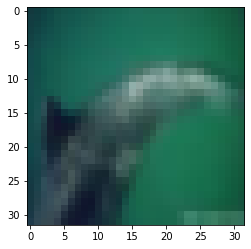

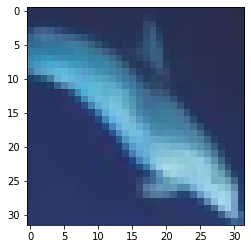

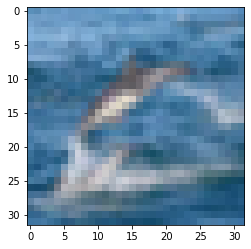

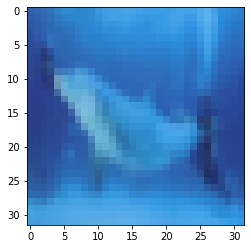

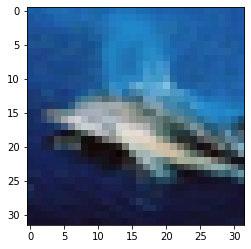

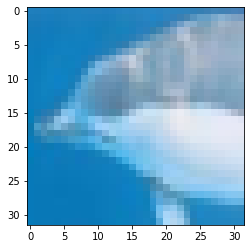

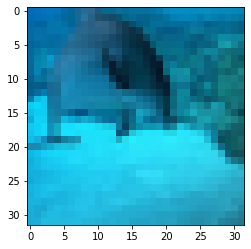

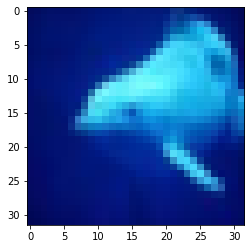

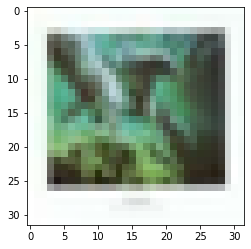

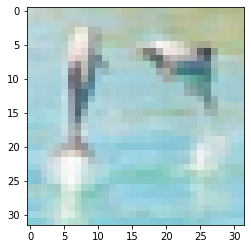

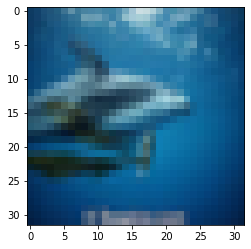

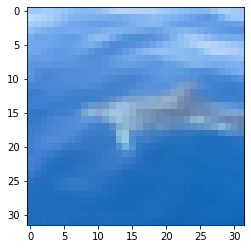

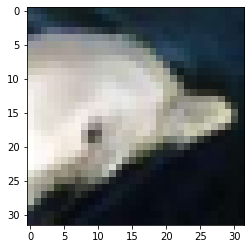

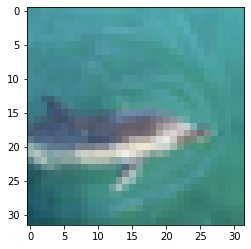

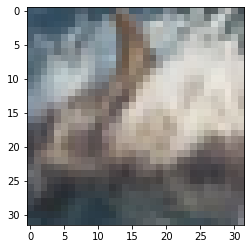

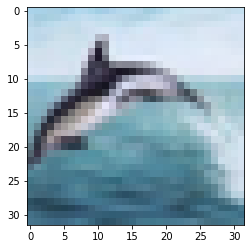

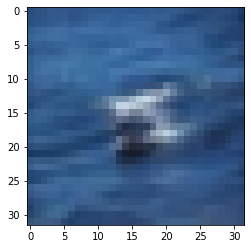

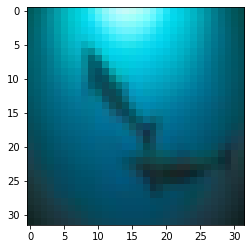

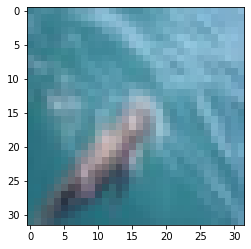

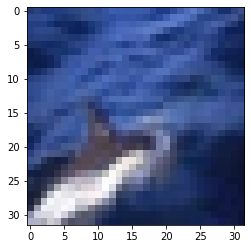

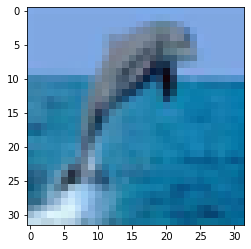

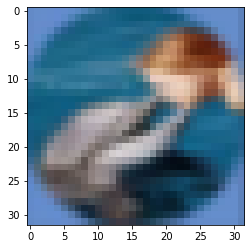

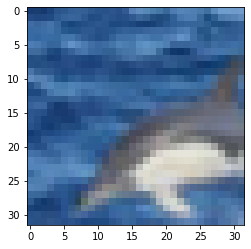

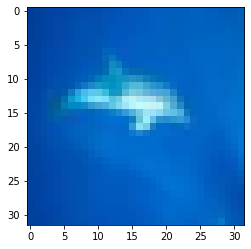

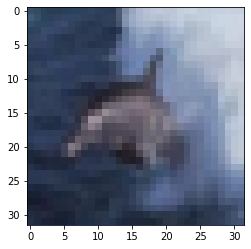

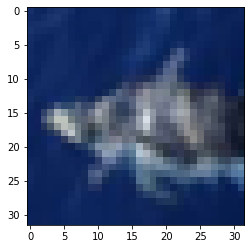

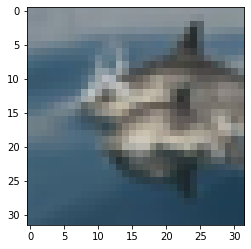

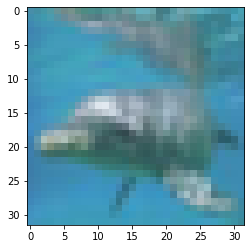

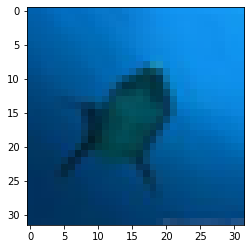

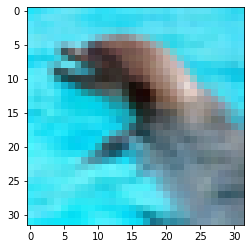

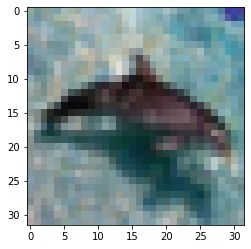

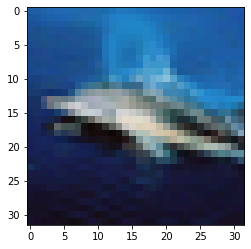

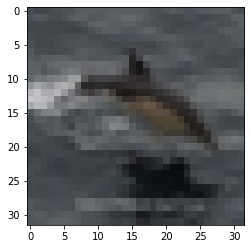

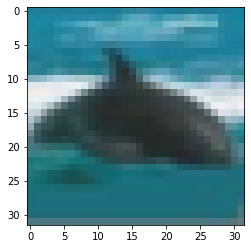

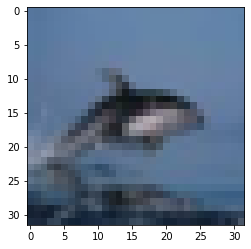

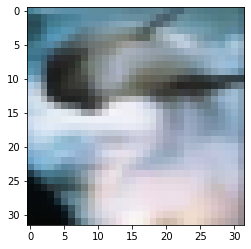

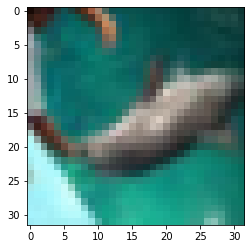

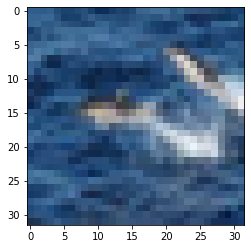

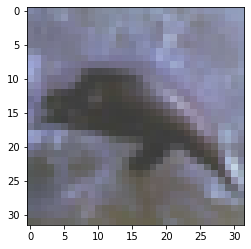

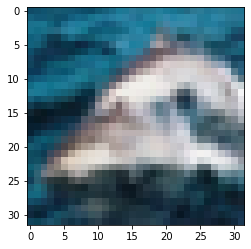

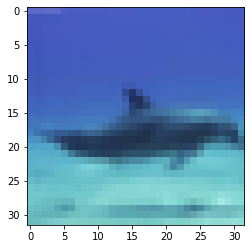

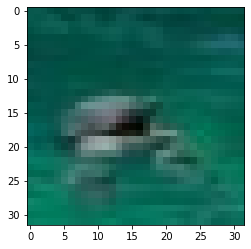

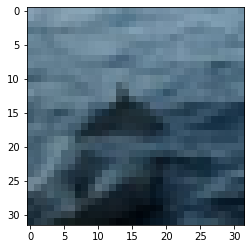

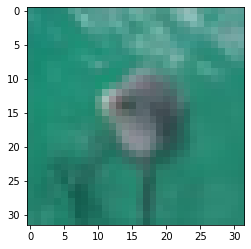

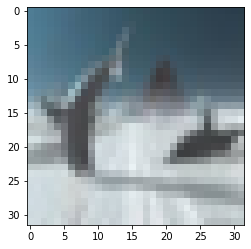

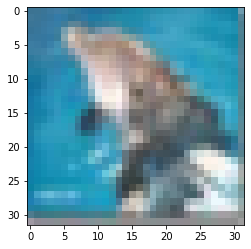

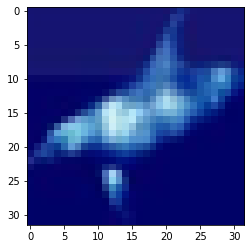

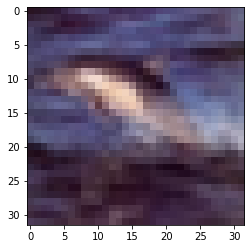

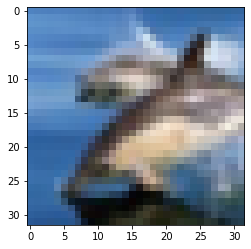

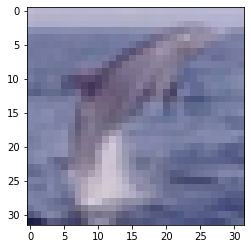

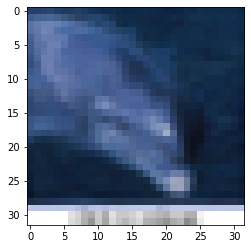

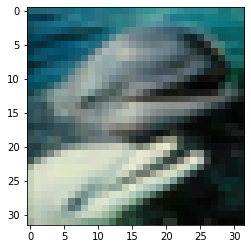

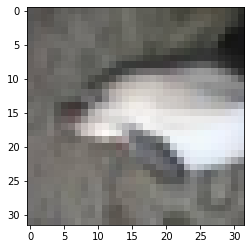

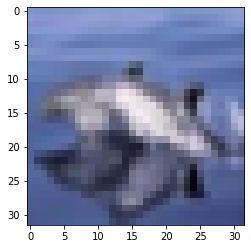

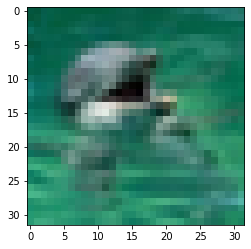

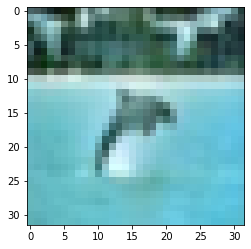

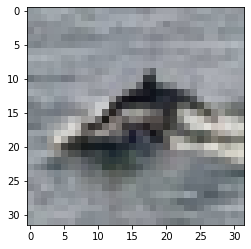

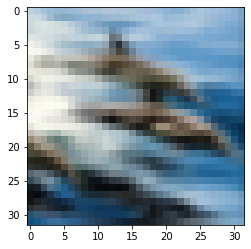

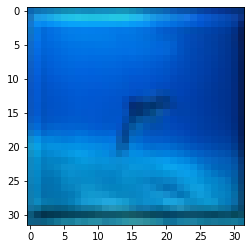

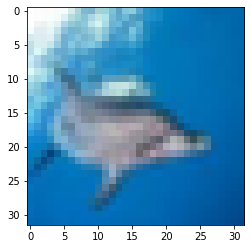

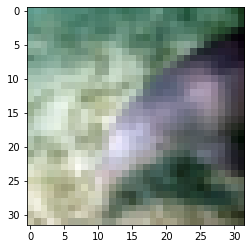

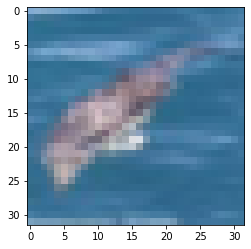

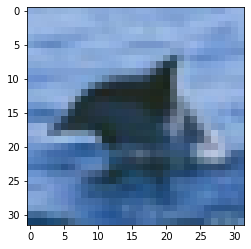

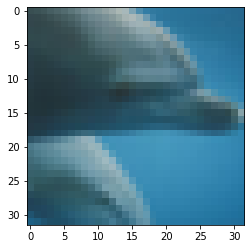

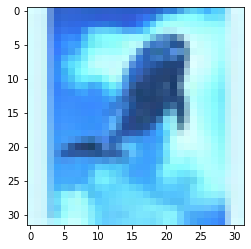

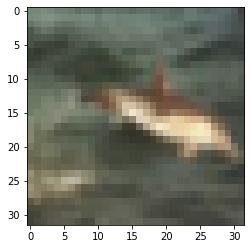

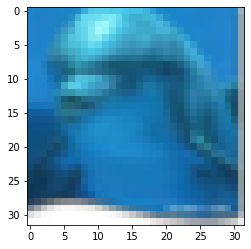

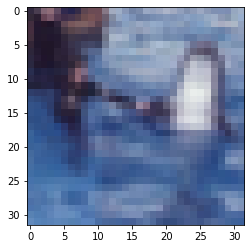

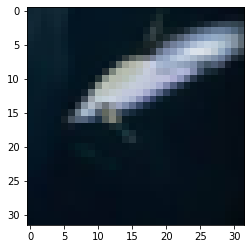

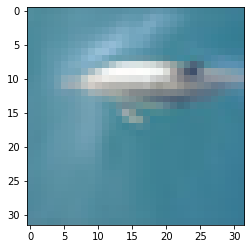

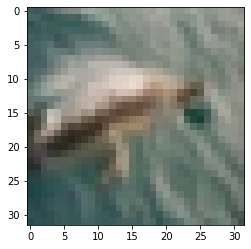

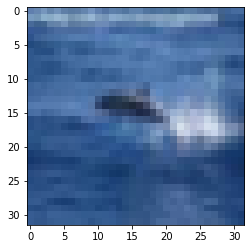

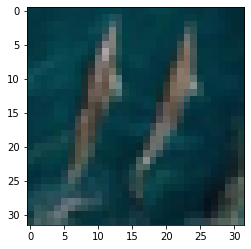

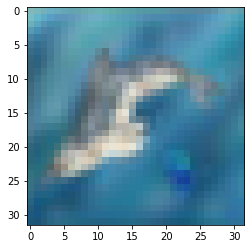

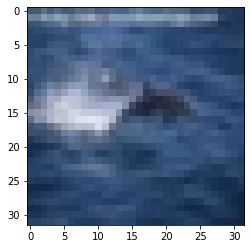

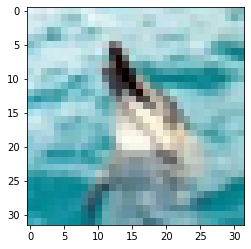

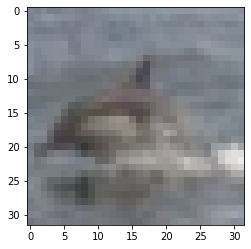

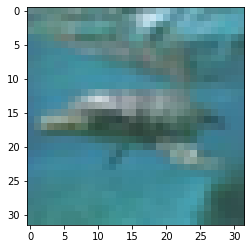

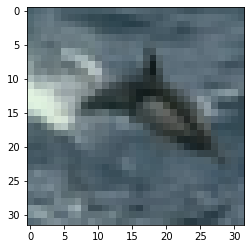

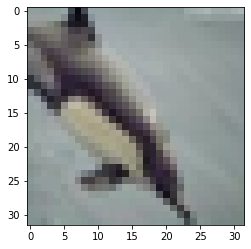

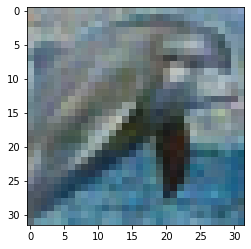

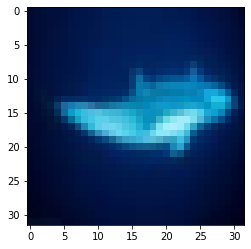

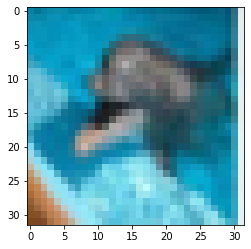

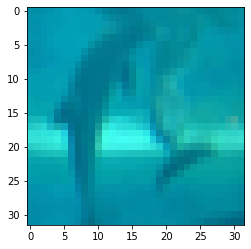

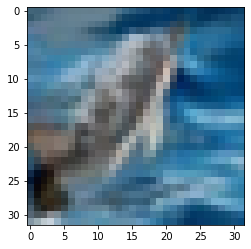

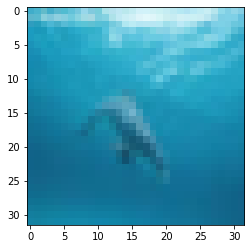

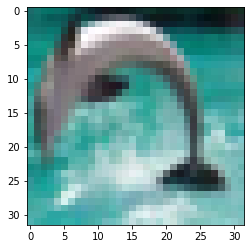

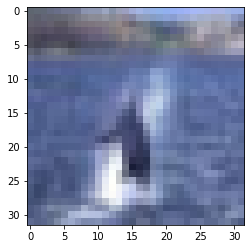

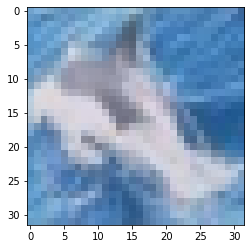

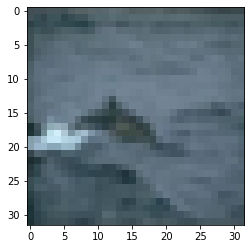

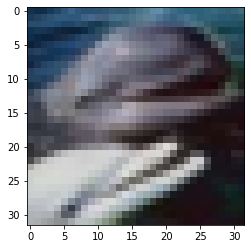

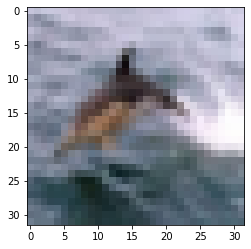

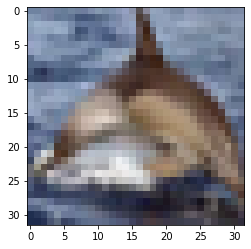

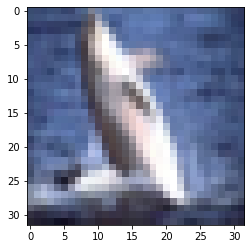

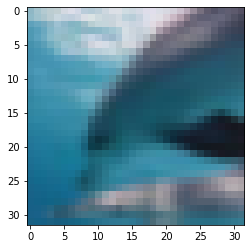

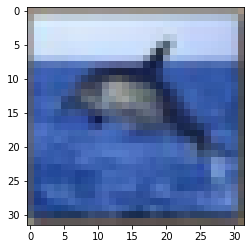

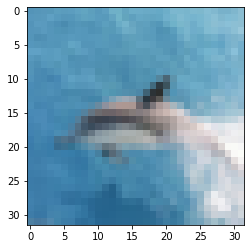

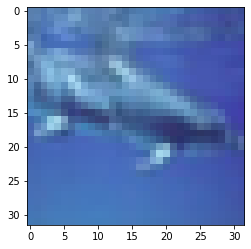

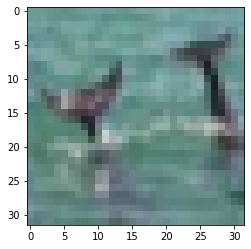

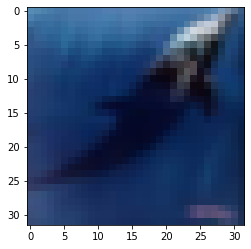

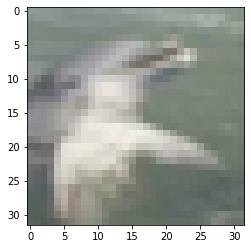

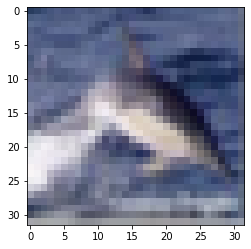

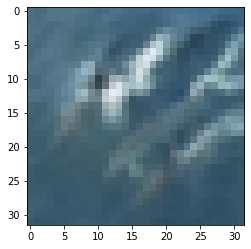

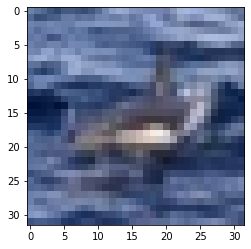

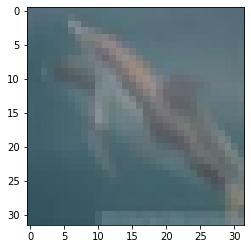

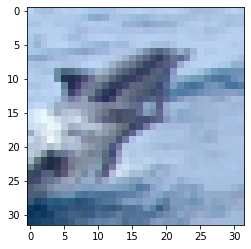

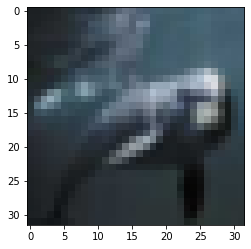

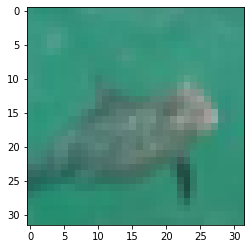

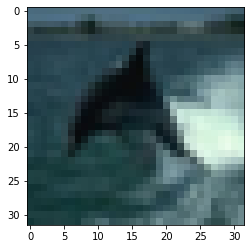

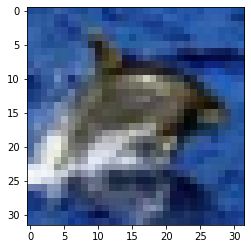

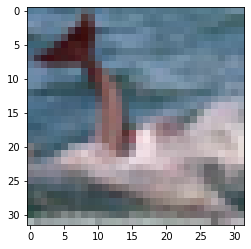

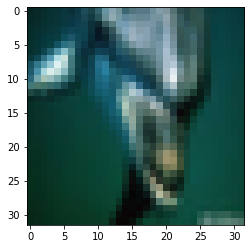

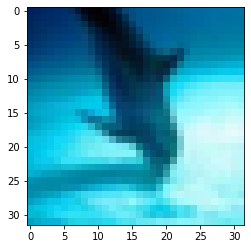

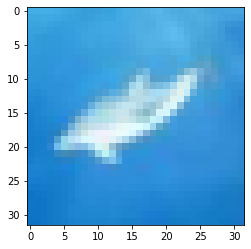

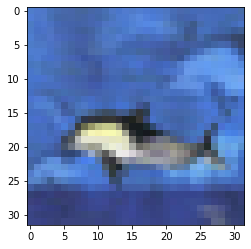

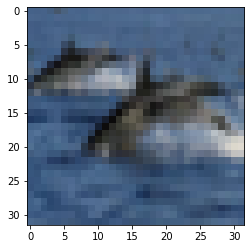

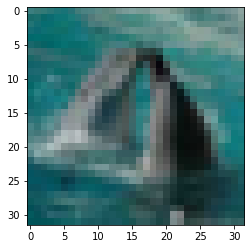

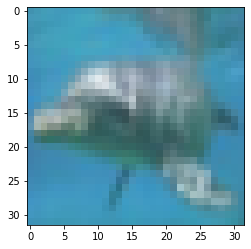

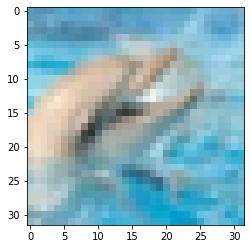

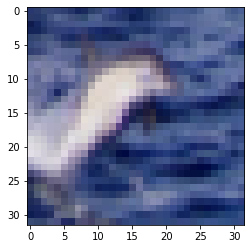

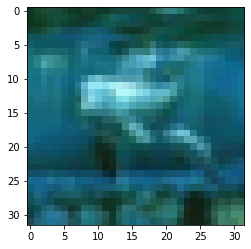

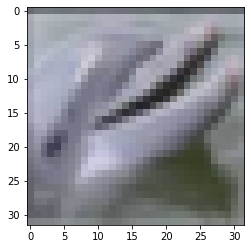

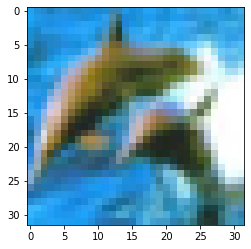

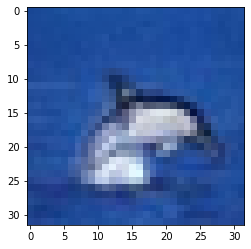

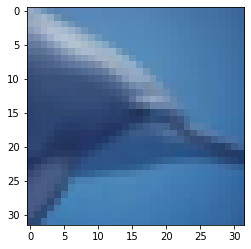

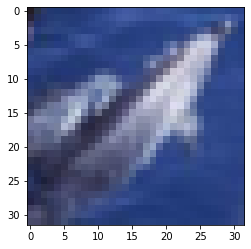

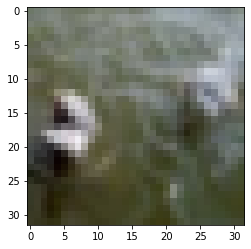

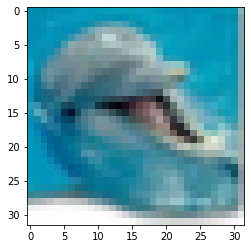

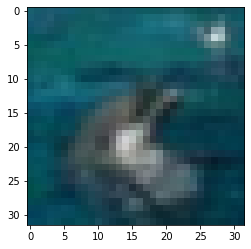

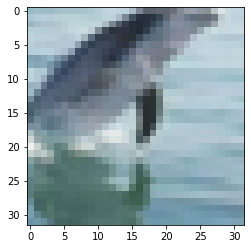

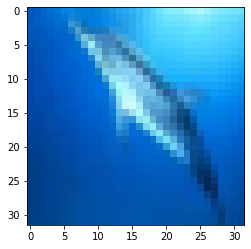

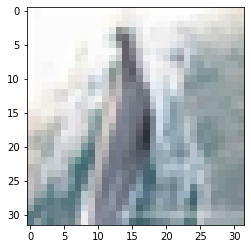

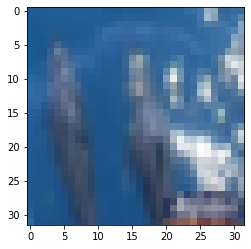

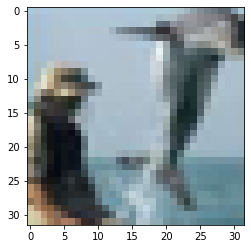

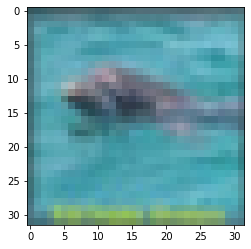

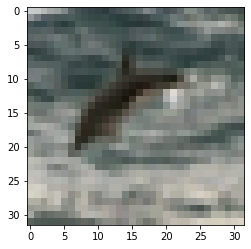

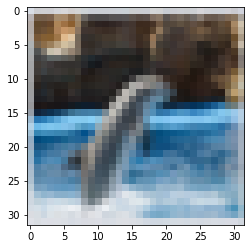

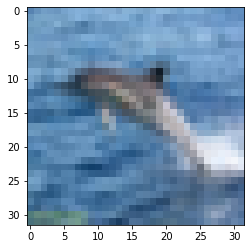

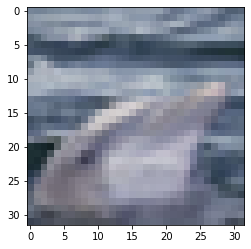

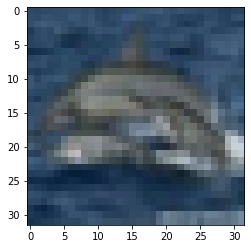

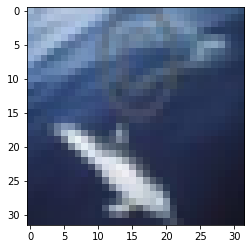

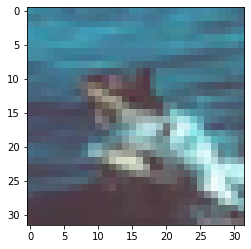

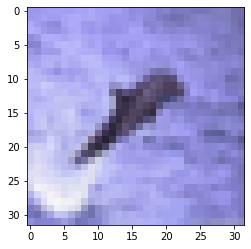

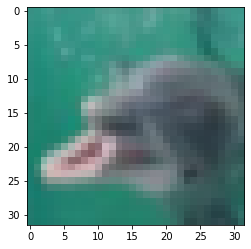

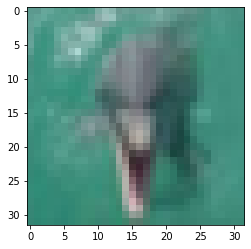

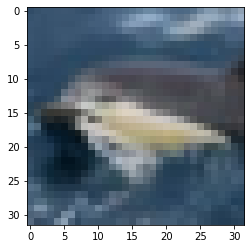

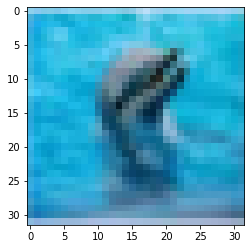

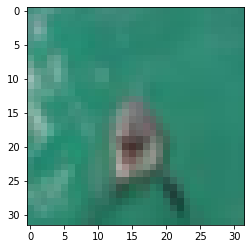

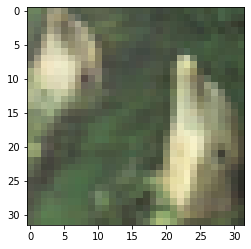

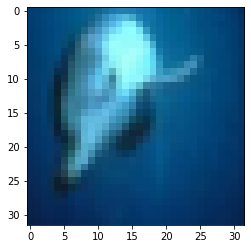

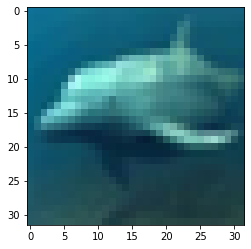

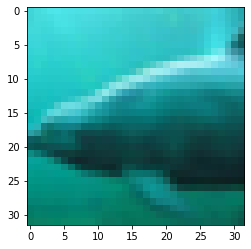

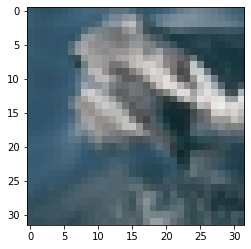

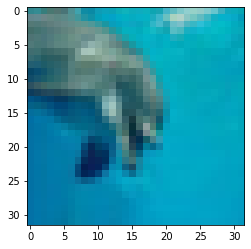

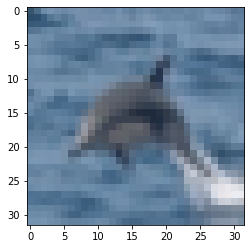

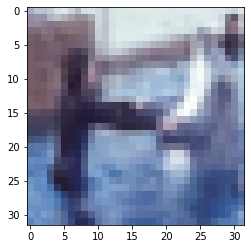

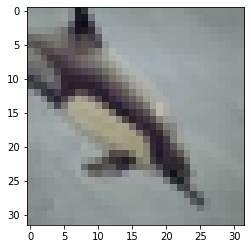

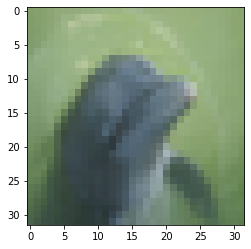

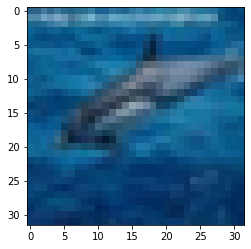

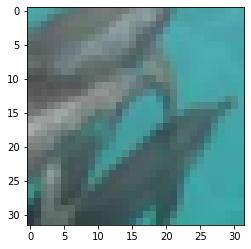

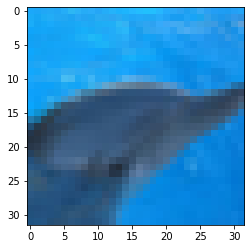

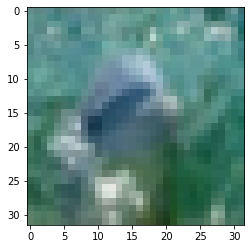

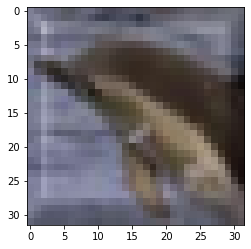

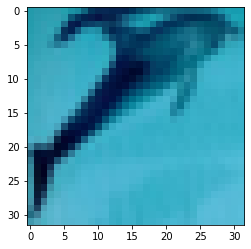

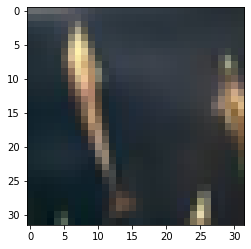

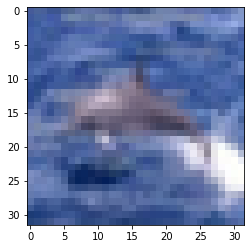

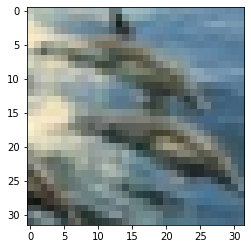

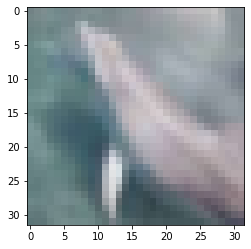

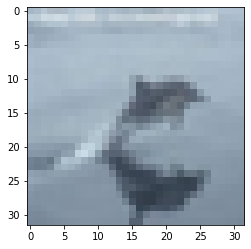

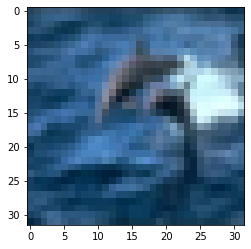

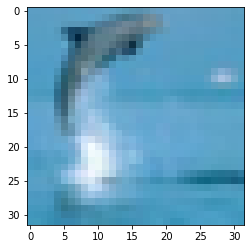

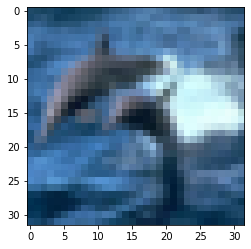

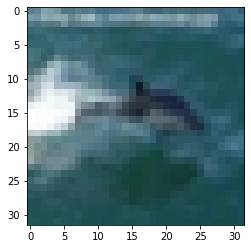

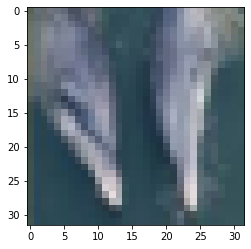

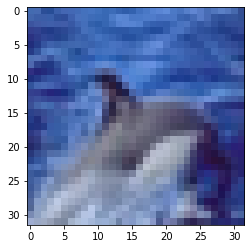

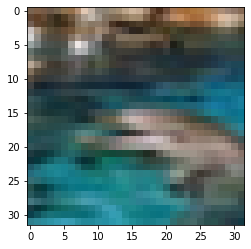

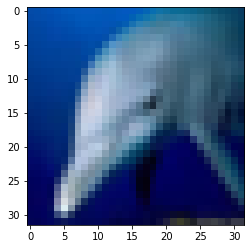

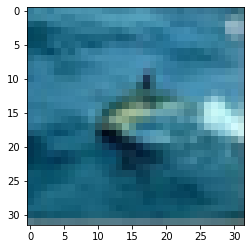

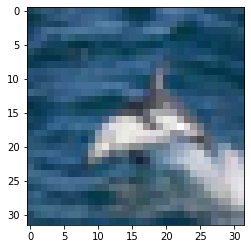

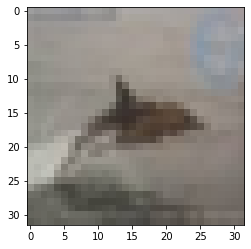

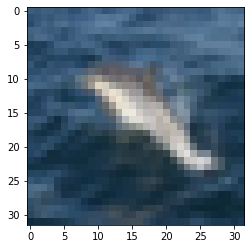

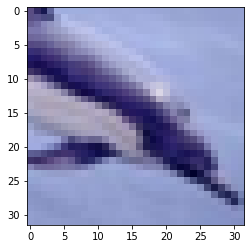

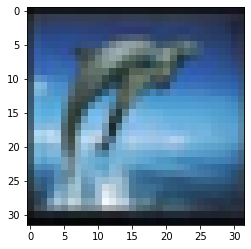

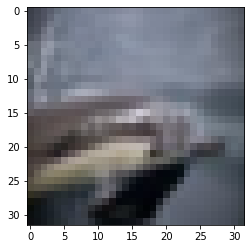

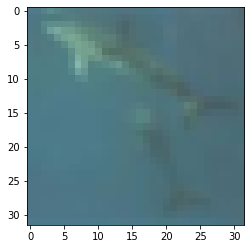

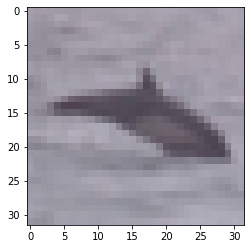

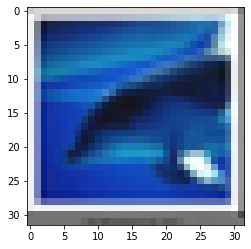

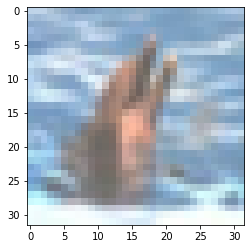

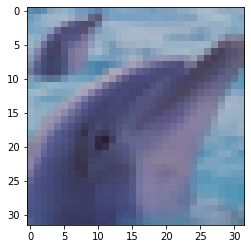

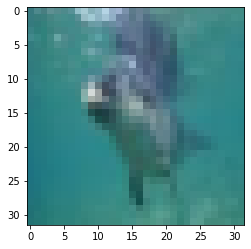

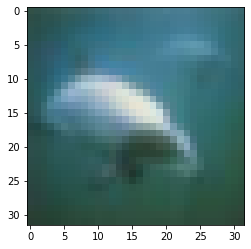

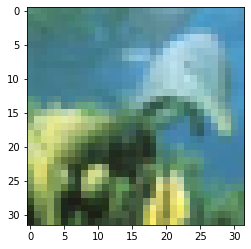

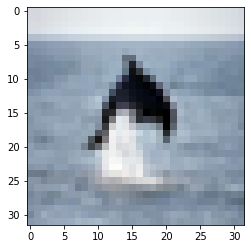

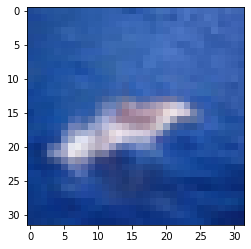

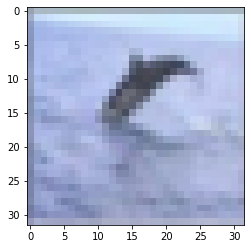

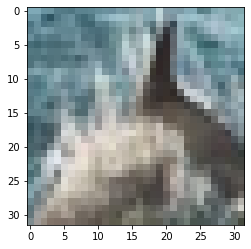

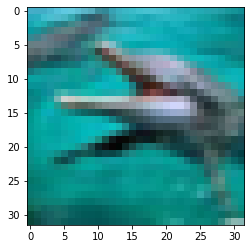

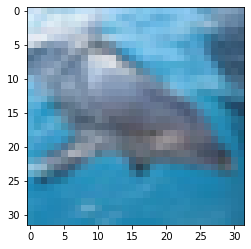

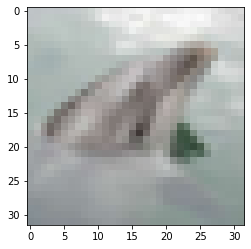

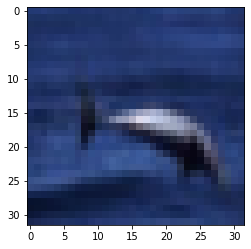

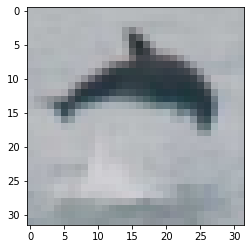

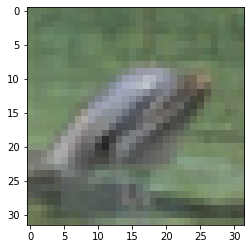

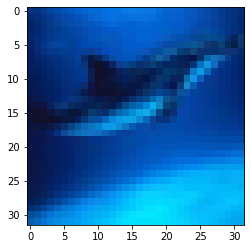

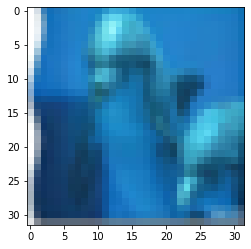

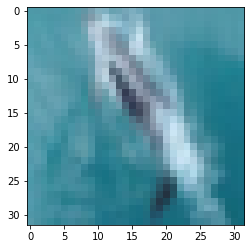

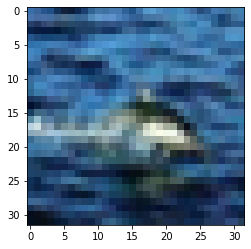

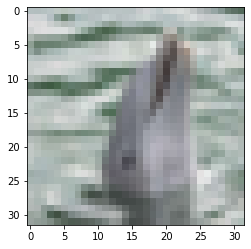

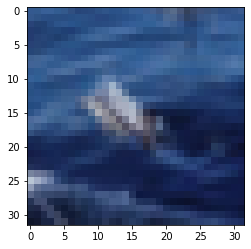

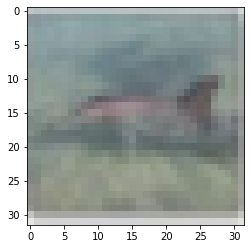

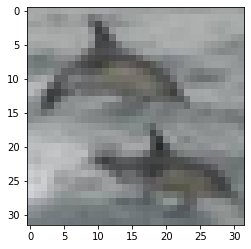

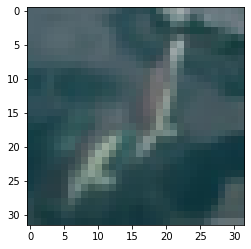

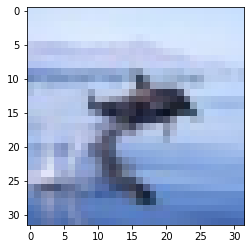

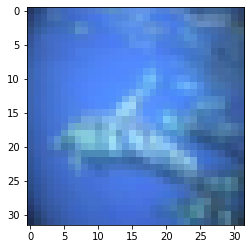

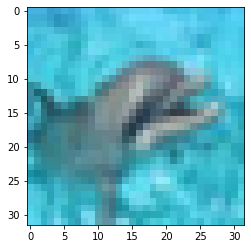

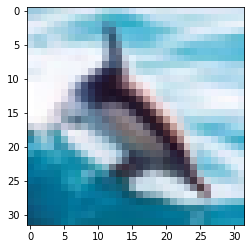

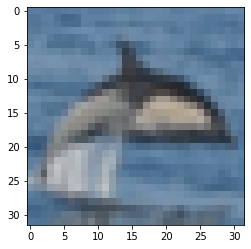

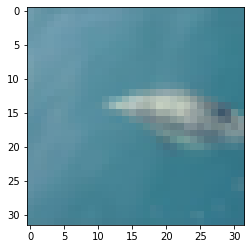

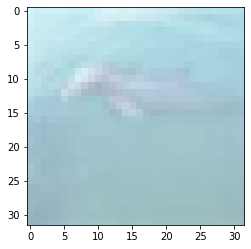

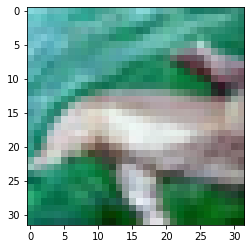

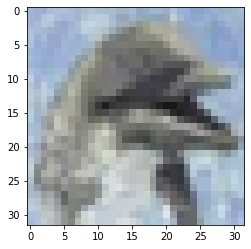

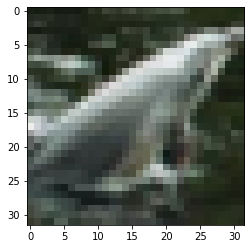

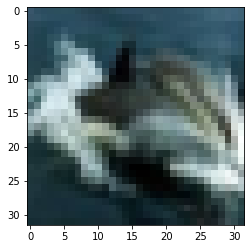

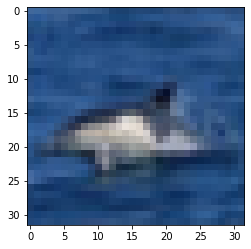

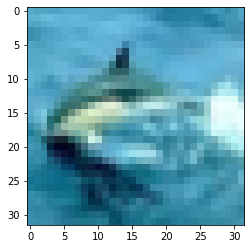

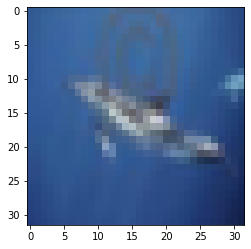

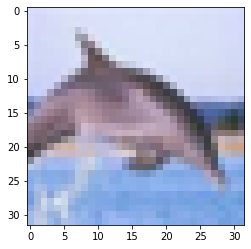

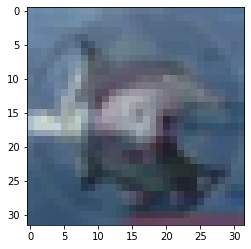

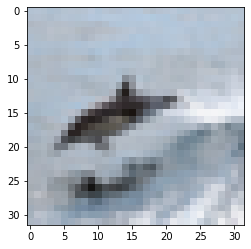

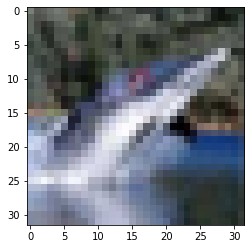

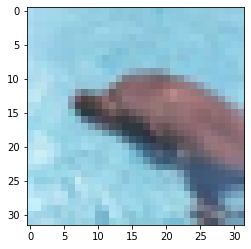

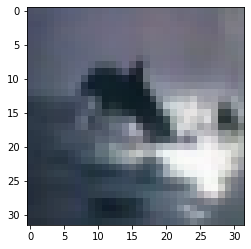

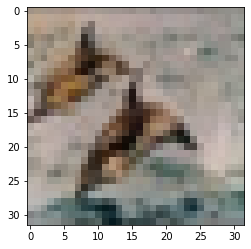

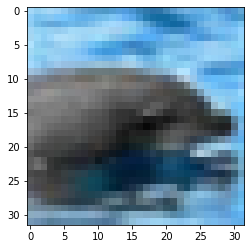

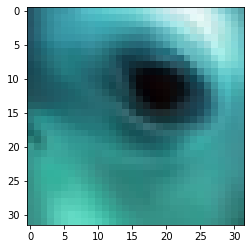

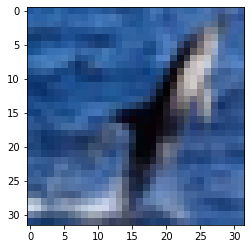

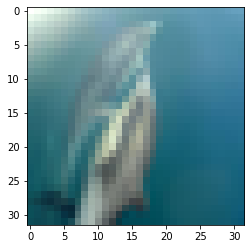

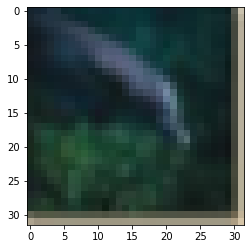

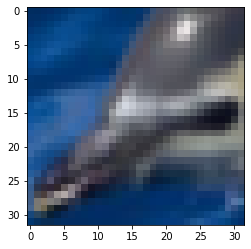

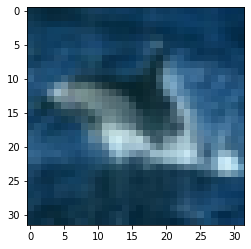

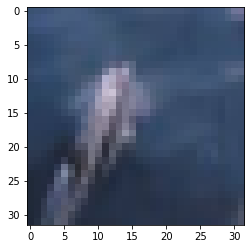

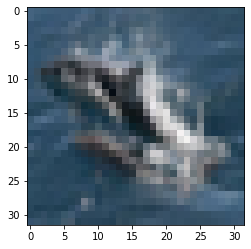

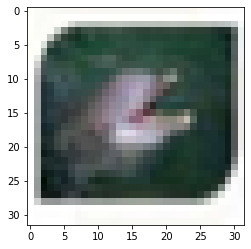

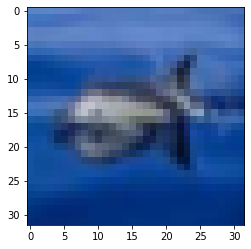

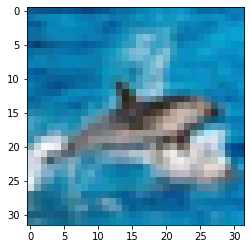

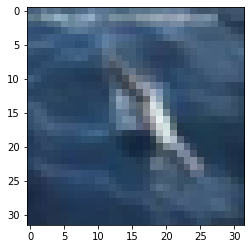

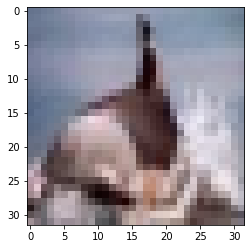

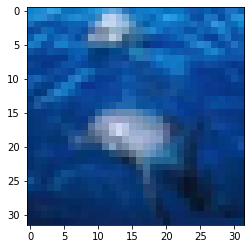

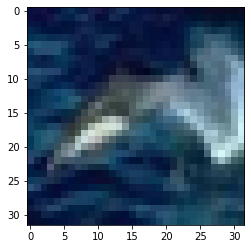

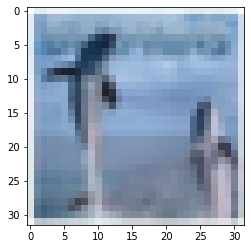

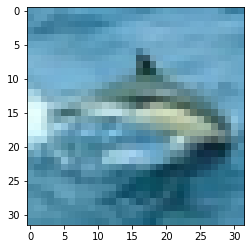

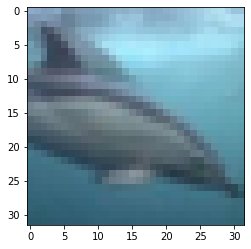

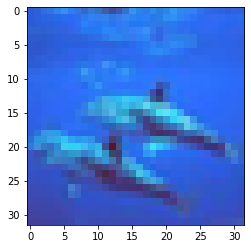

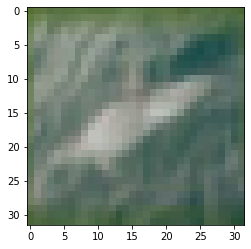

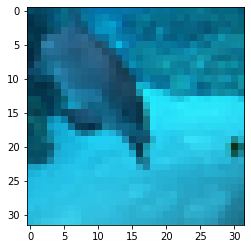

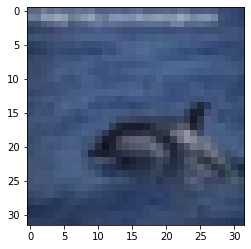

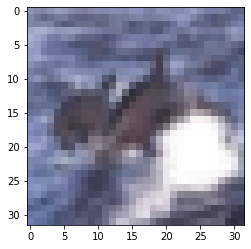

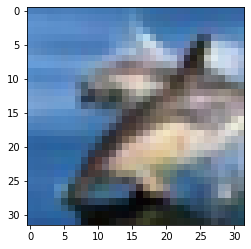

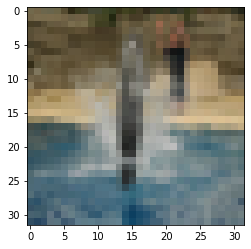

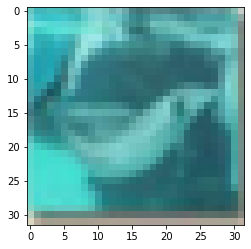

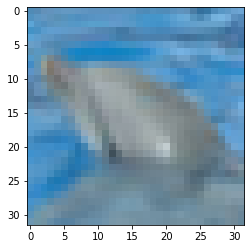

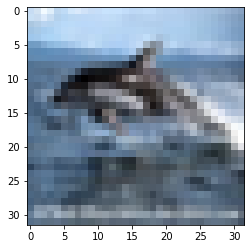

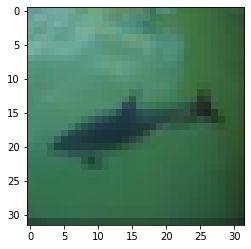

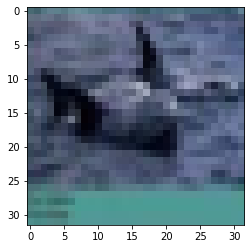

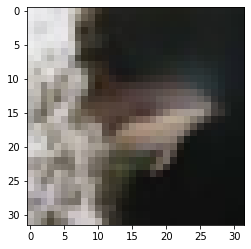

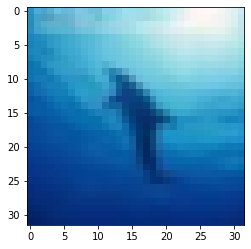

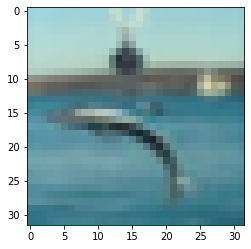

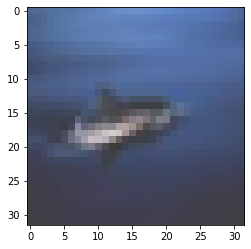

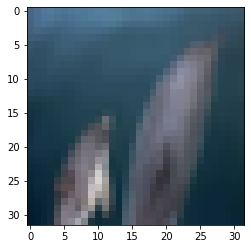

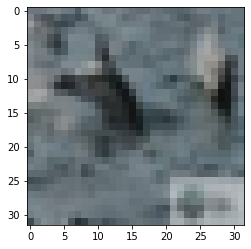

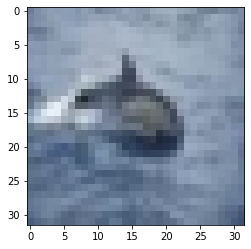

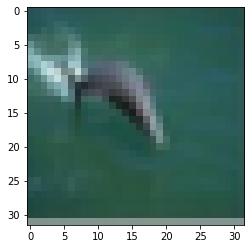

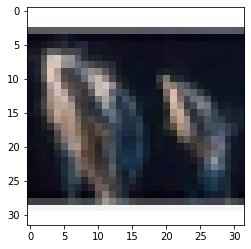

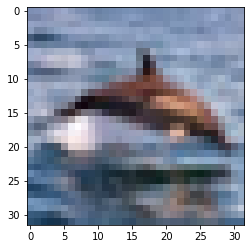

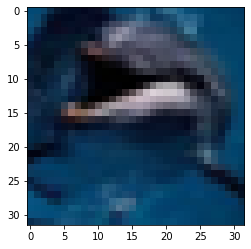

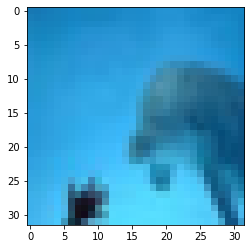

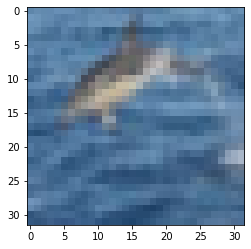

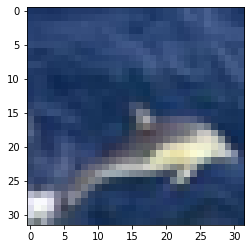

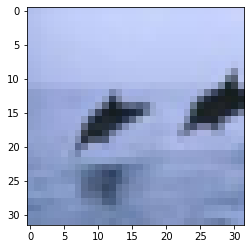

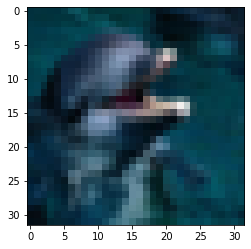

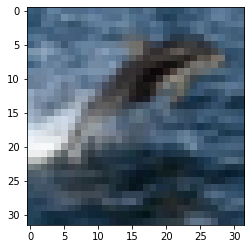

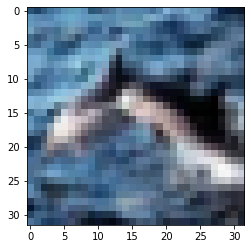

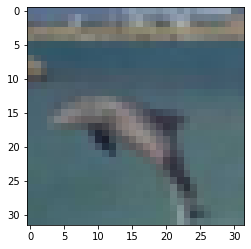

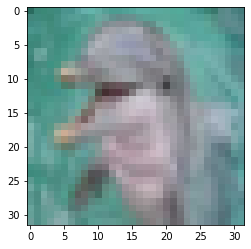

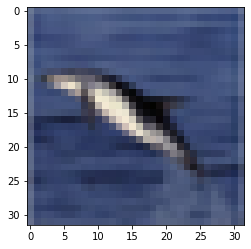

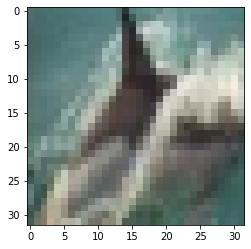

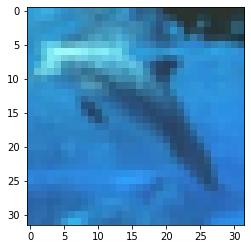

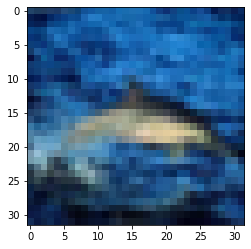

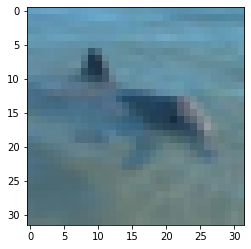

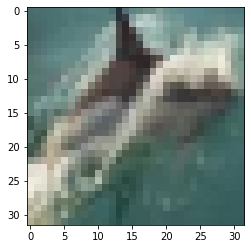

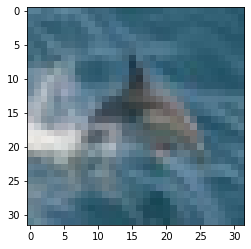

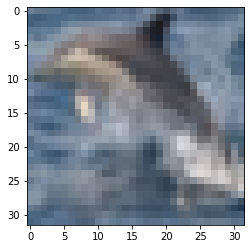

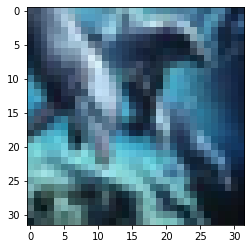

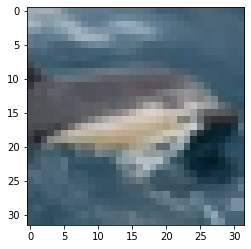

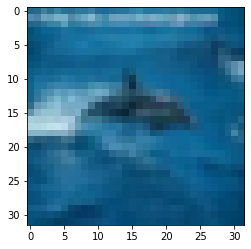

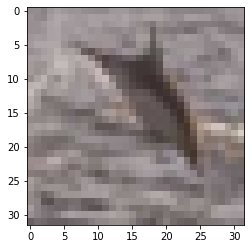

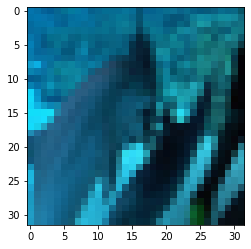

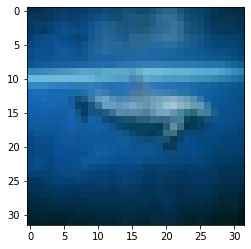

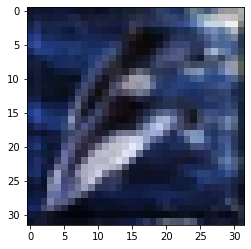

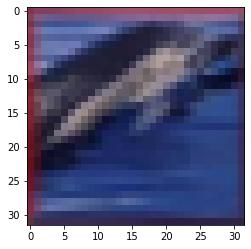

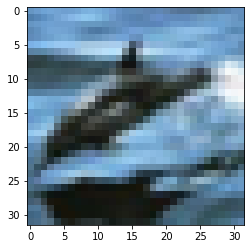

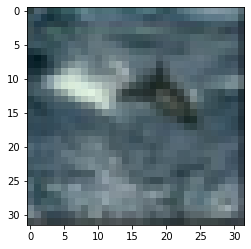

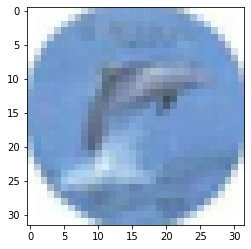

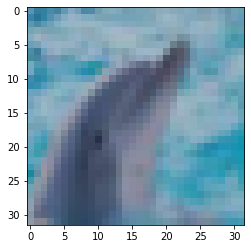

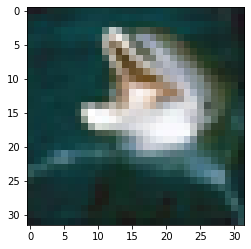

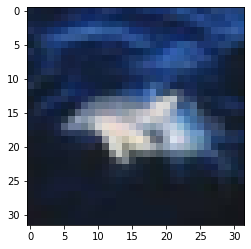

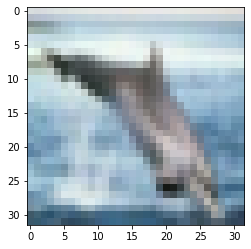

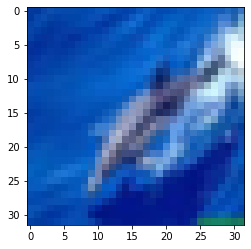

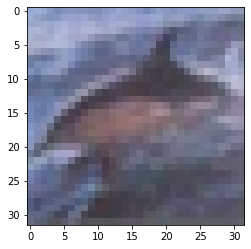

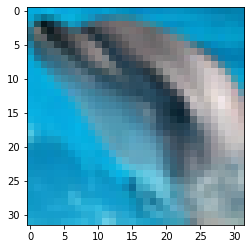

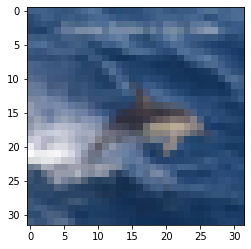

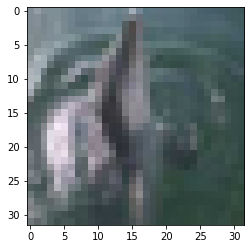

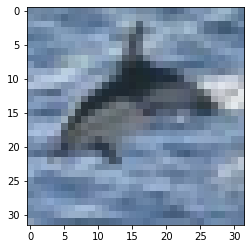

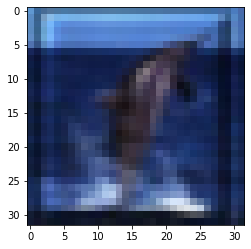

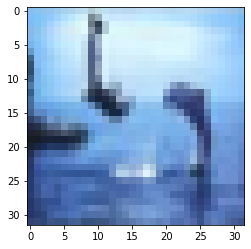

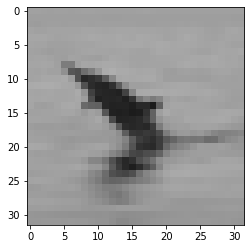

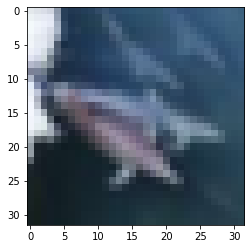

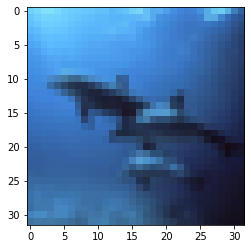

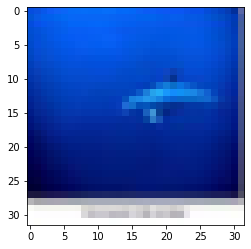

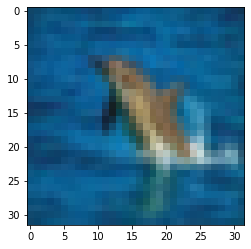

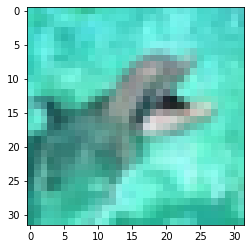

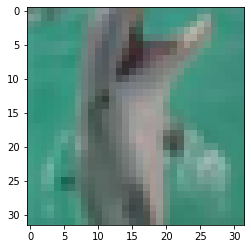

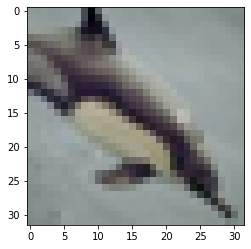

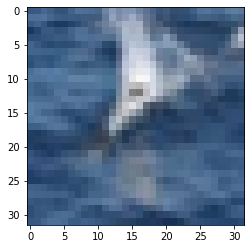

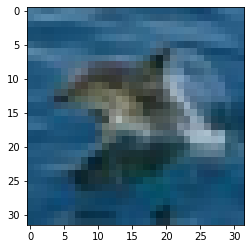

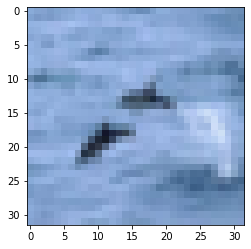

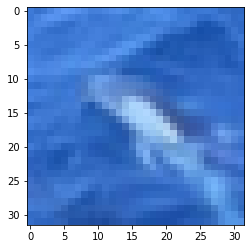

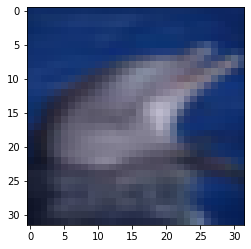

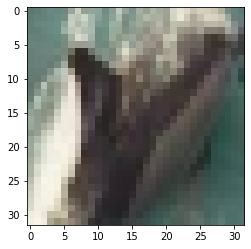

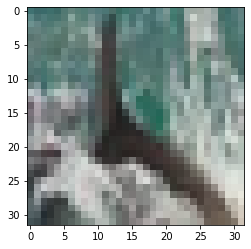

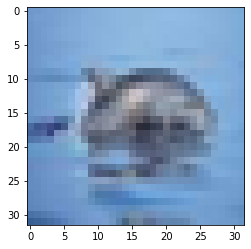

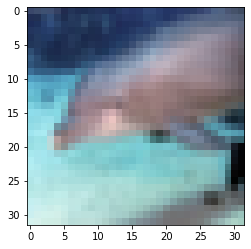

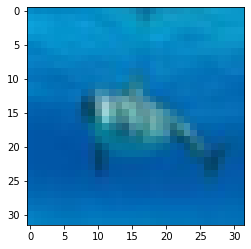

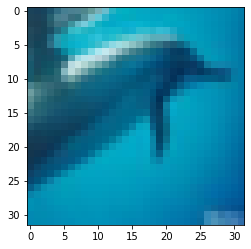

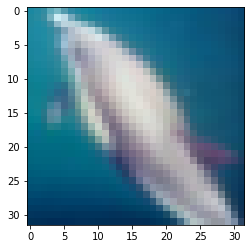

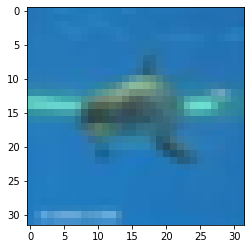

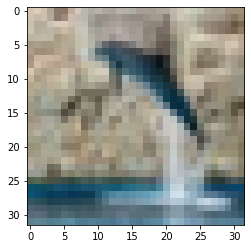

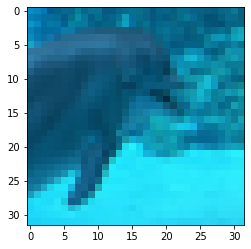

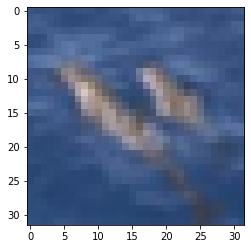

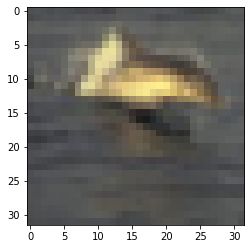

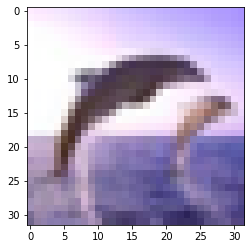

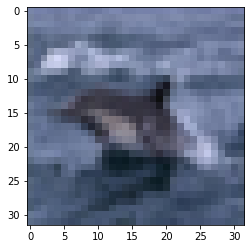

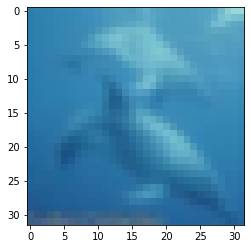

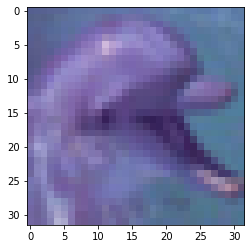

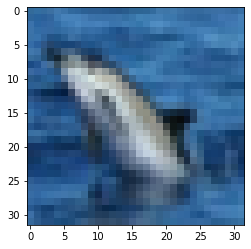

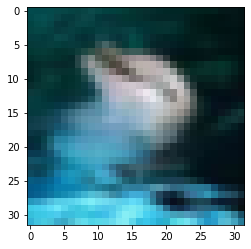

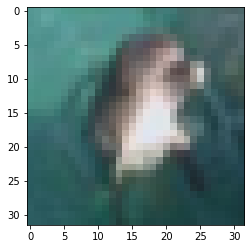

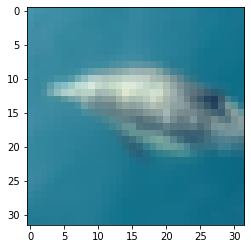

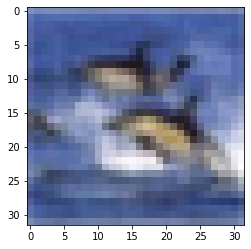

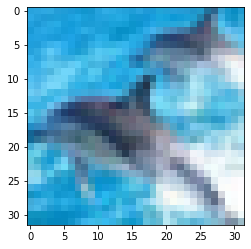

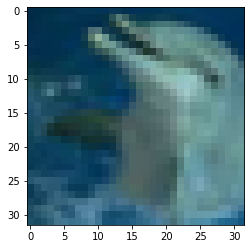

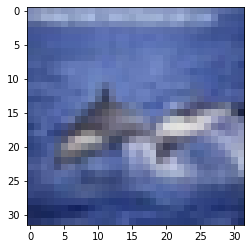

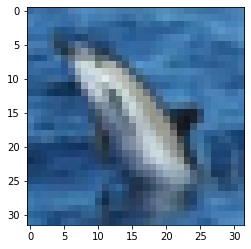

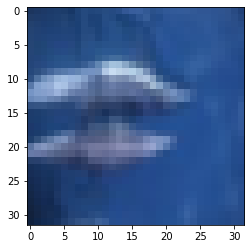

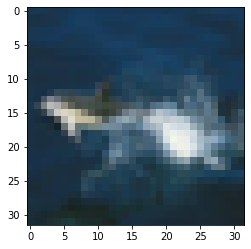

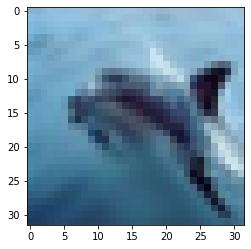

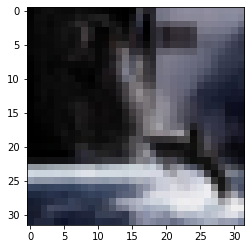

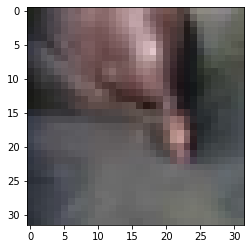

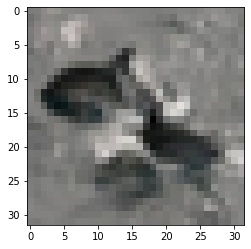

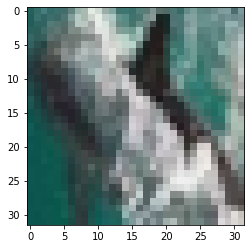

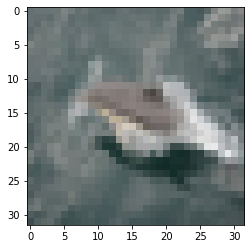

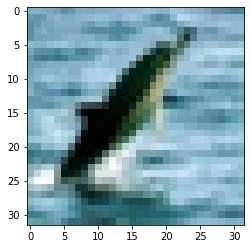

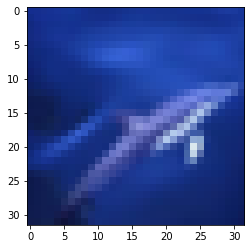

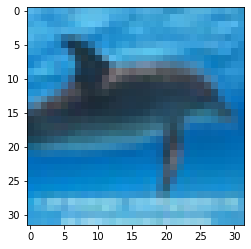

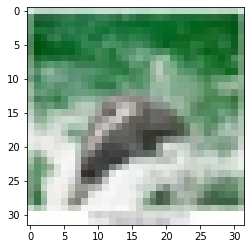

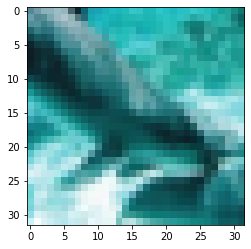

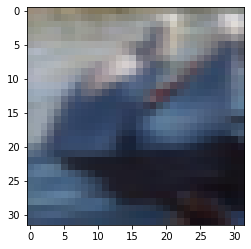

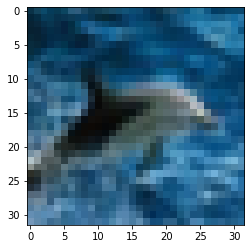

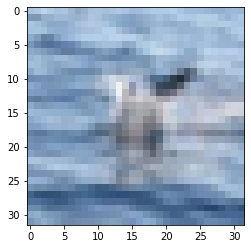

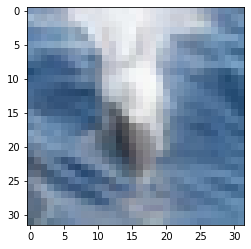

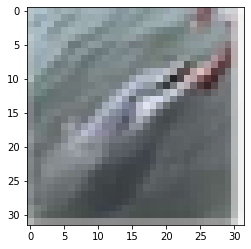

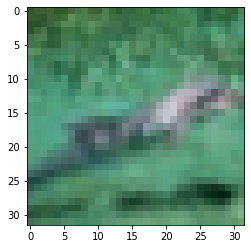

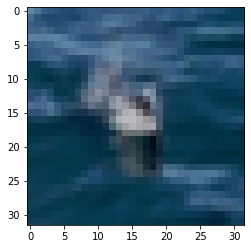

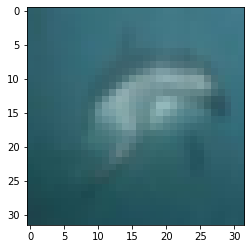

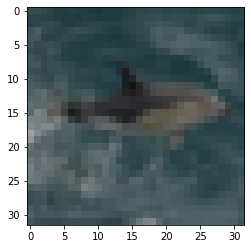

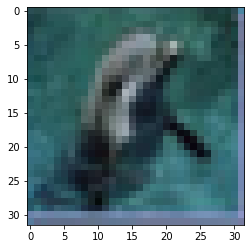

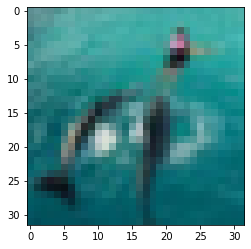

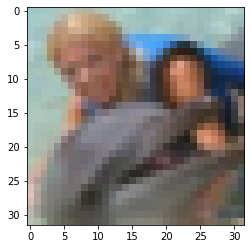

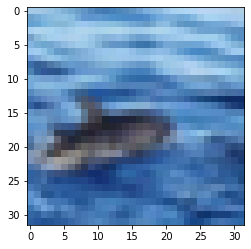

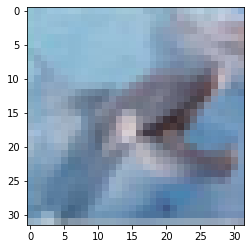

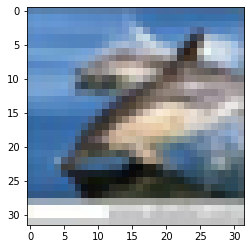

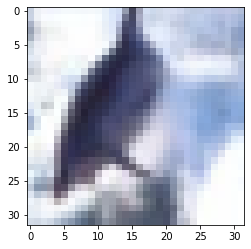

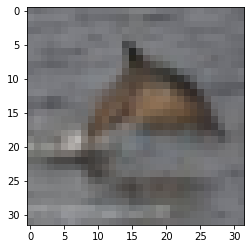

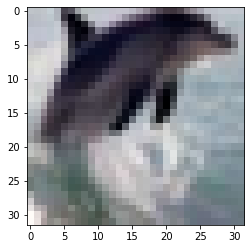

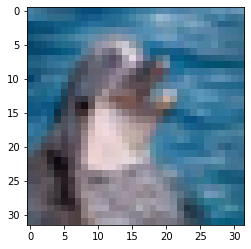

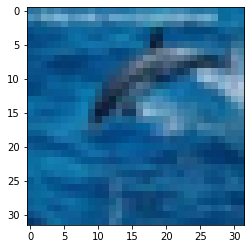

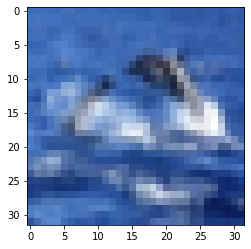

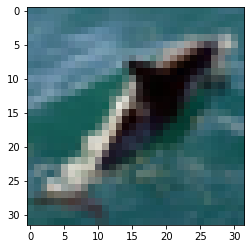

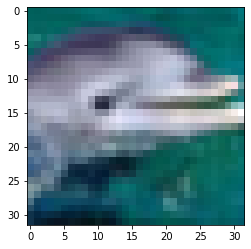

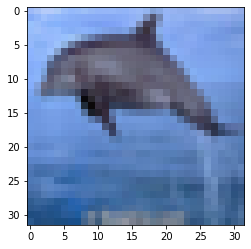

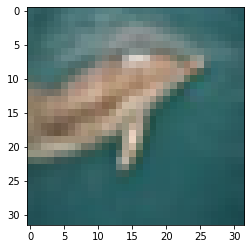

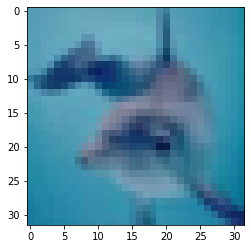

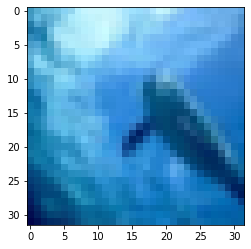

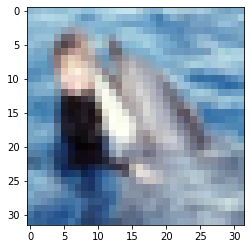

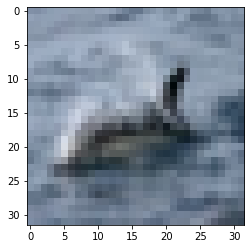

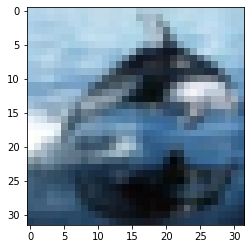

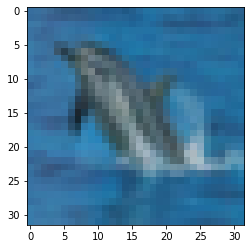

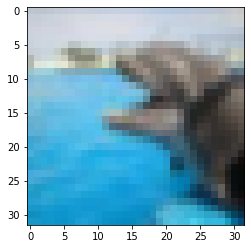

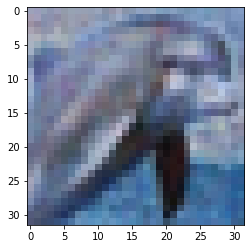

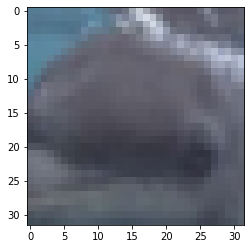

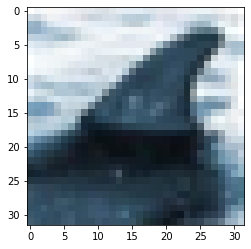

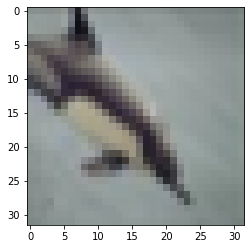

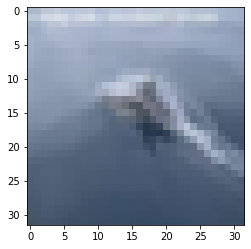

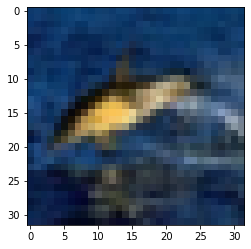

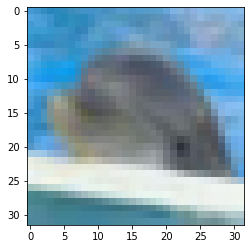

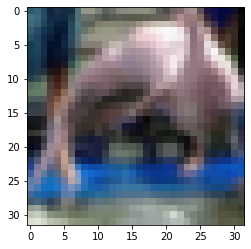

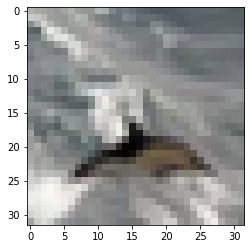

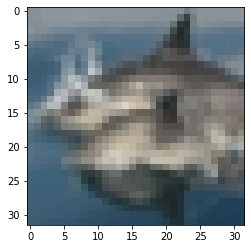

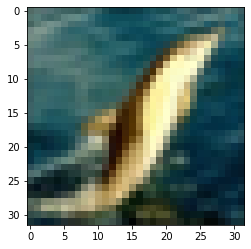

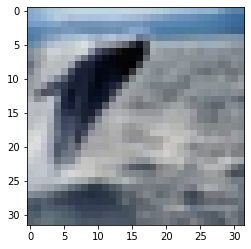

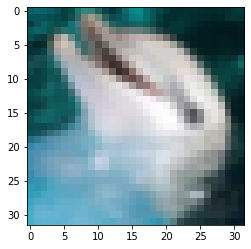

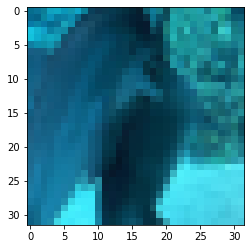

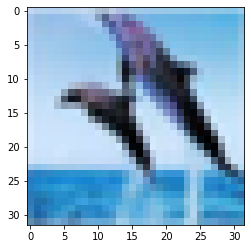

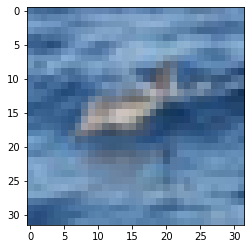

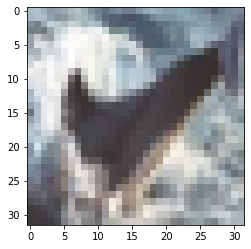

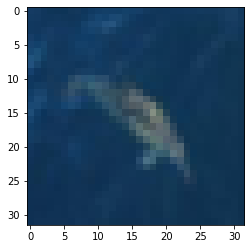

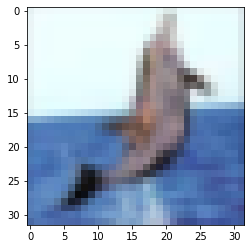

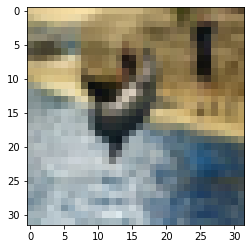

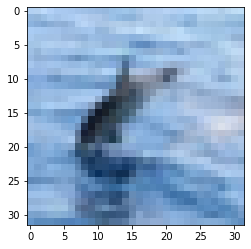

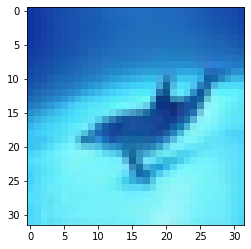

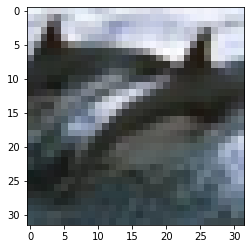

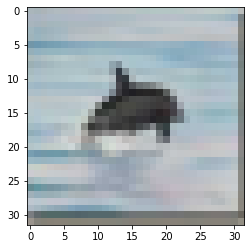

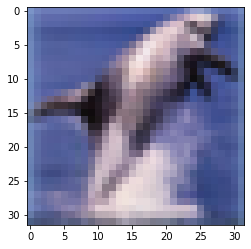

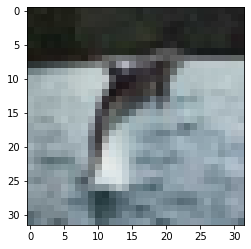

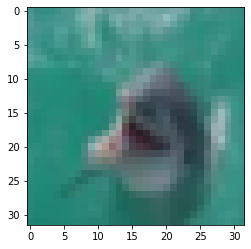

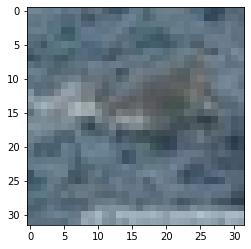

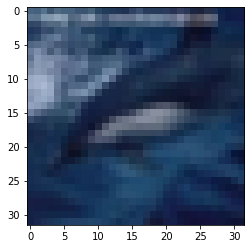

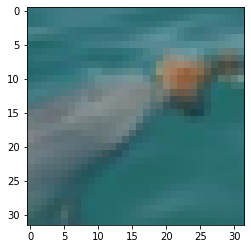

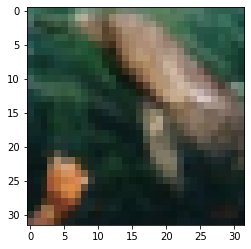

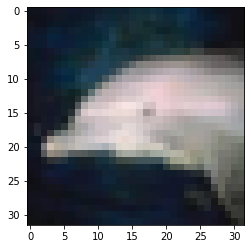

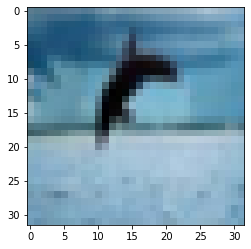

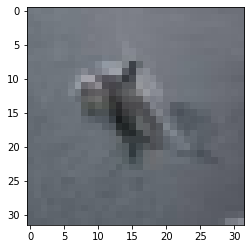

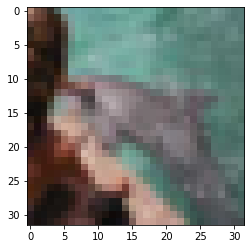

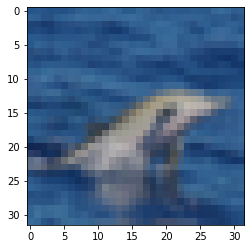

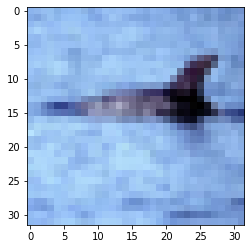

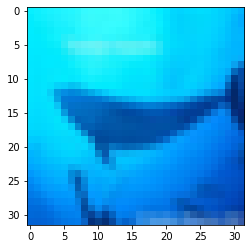

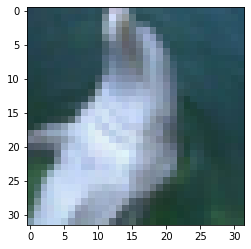

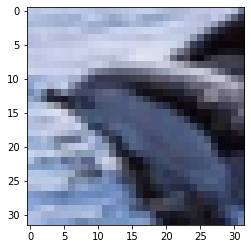

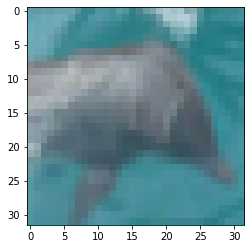

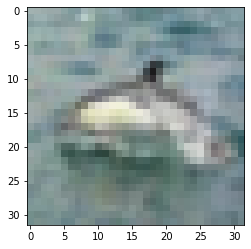

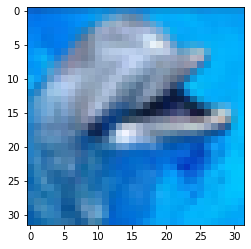

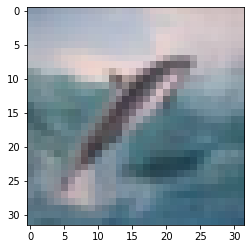

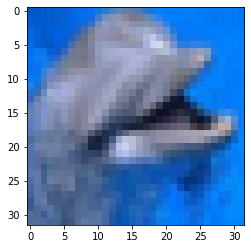

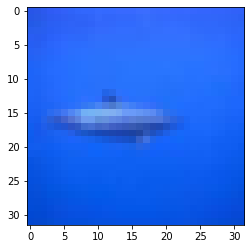

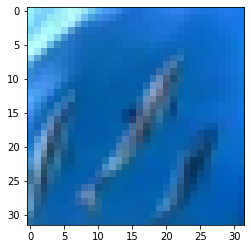

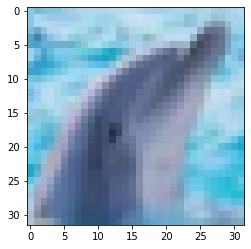

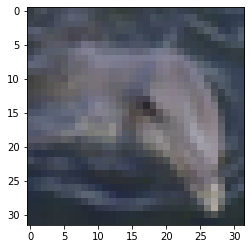

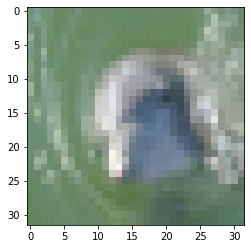

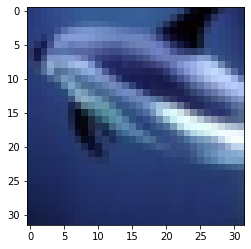

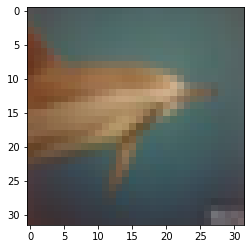

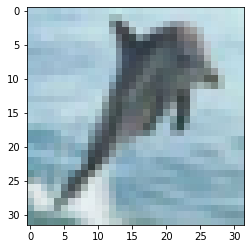

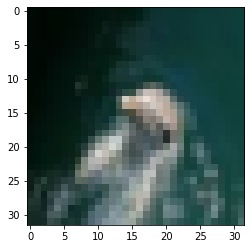

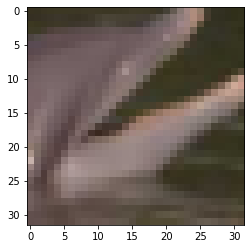

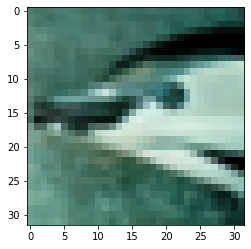

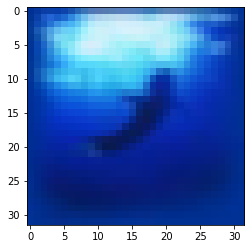

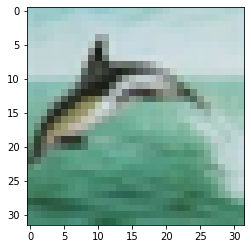

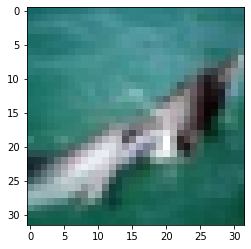

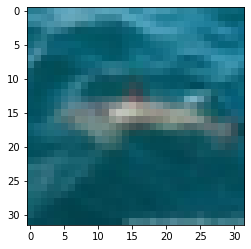

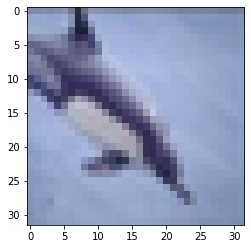

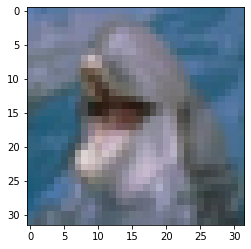

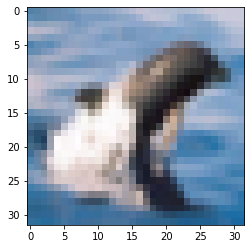

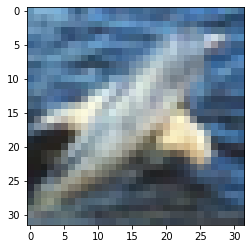

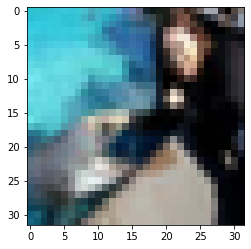

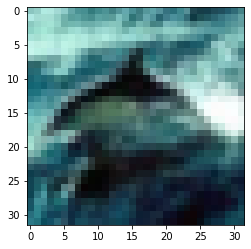

In [15]:
for img in class_n_pos:
    plt.figure()
    plt.imshow(np.uint8(x_train[img]))

## Data Transformation

In [16]:
# Preprocess data through normalization
# Normalisation of data according to predefined normalize_data method
if treat_data == "normalize": 
    x_train, x_test = normalize_data(x_train, x_test)

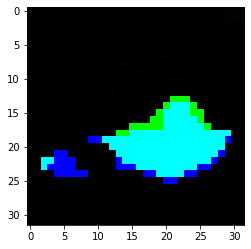

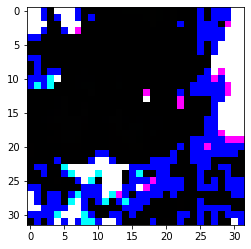

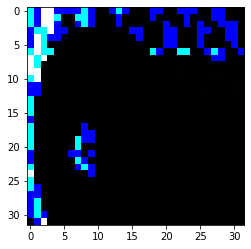

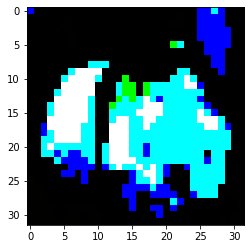

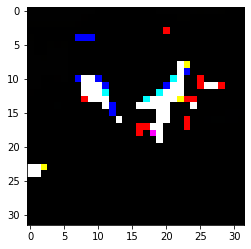

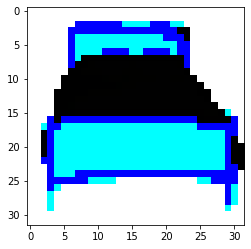

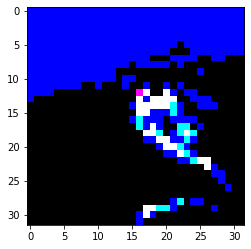

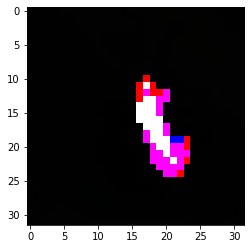

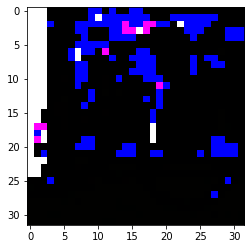

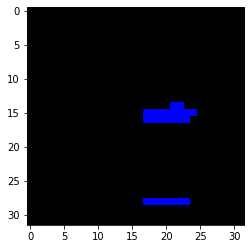

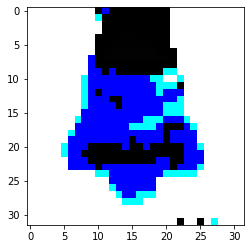

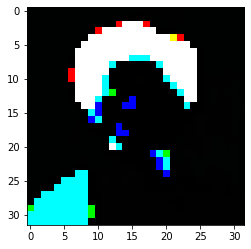

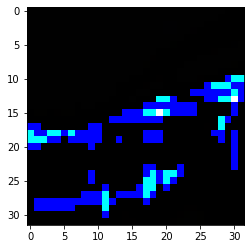

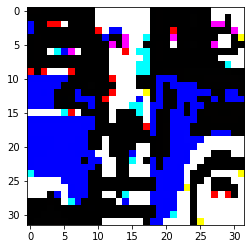

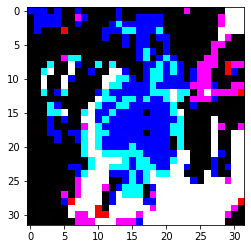

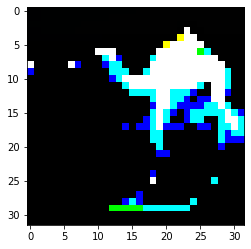

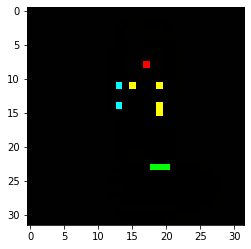

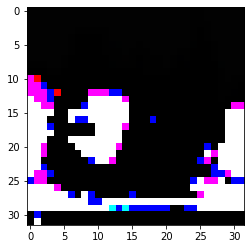

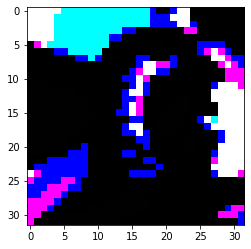

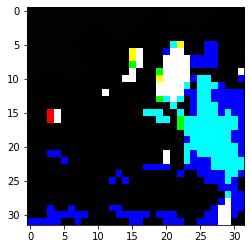

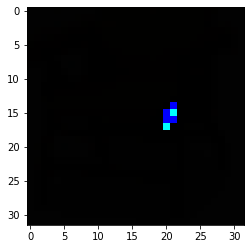

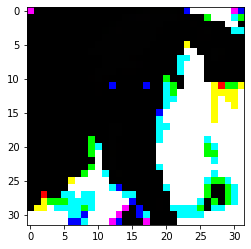

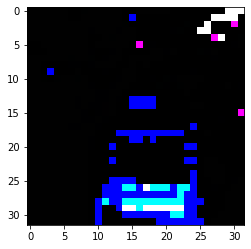

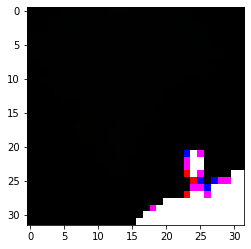

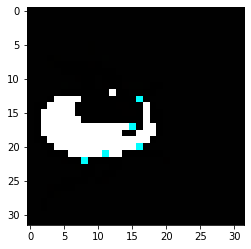

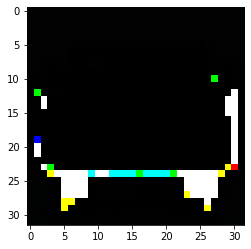

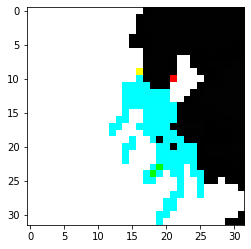

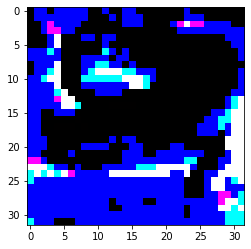

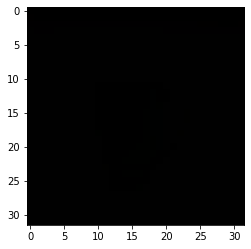

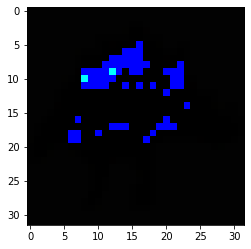

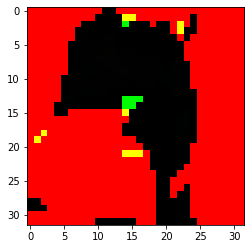

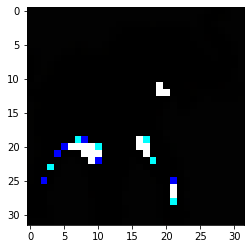

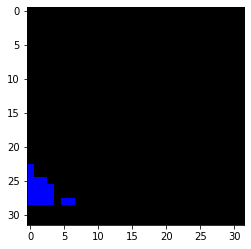

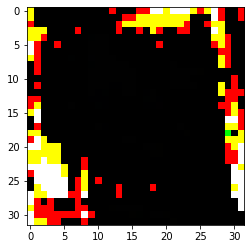

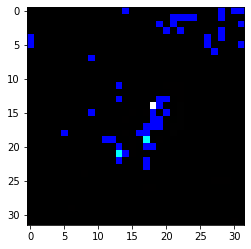

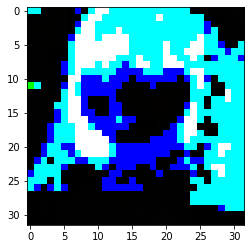

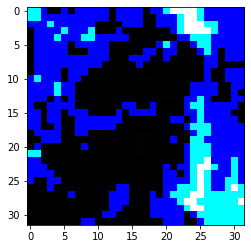

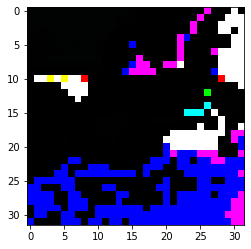

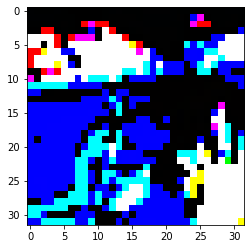

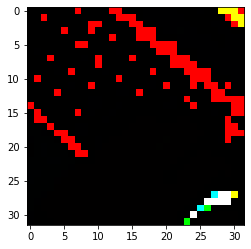

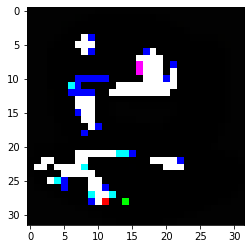

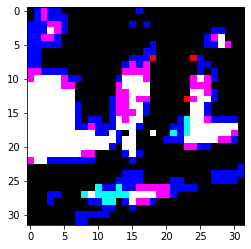

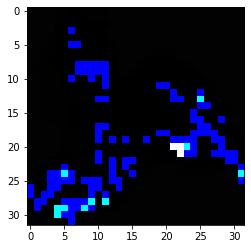

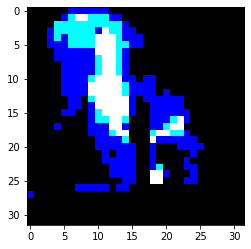

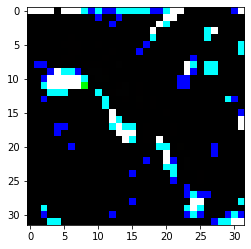

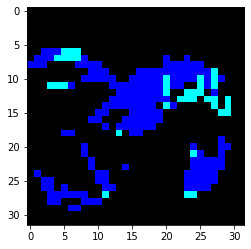

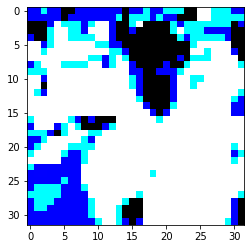

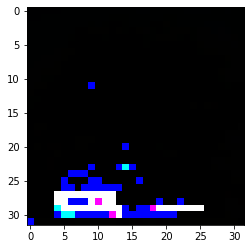

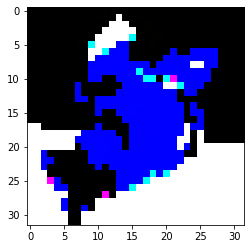

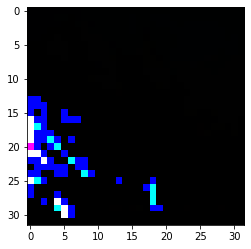

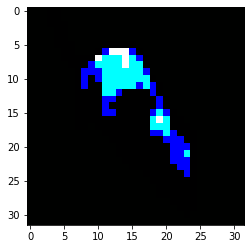

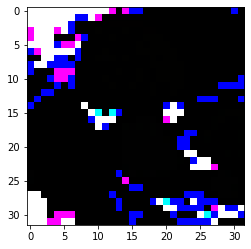

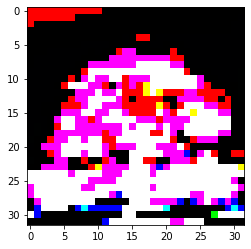

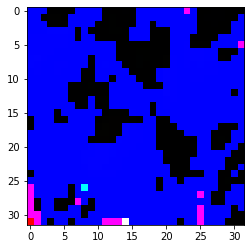

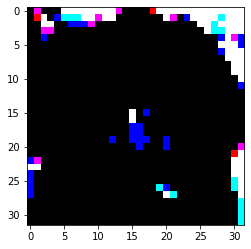

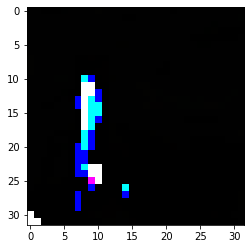

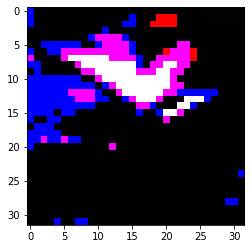

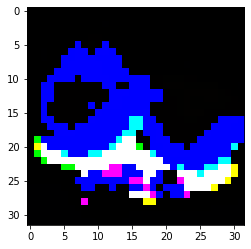

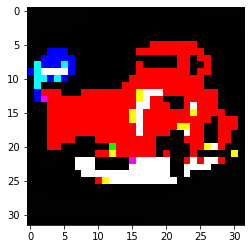

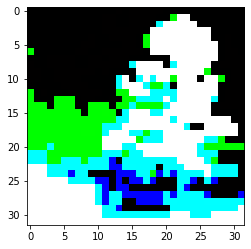

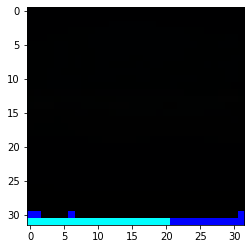

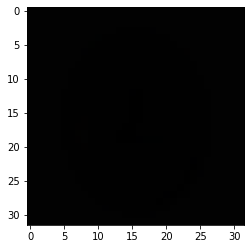

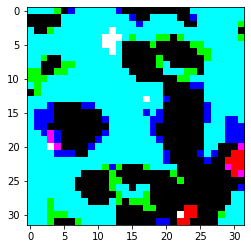

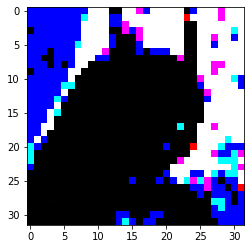

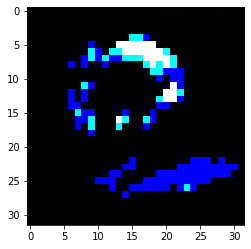

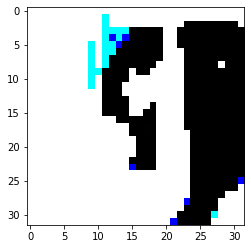

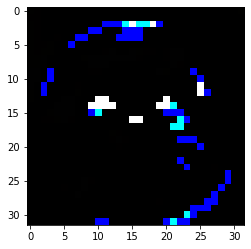

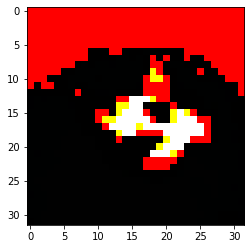

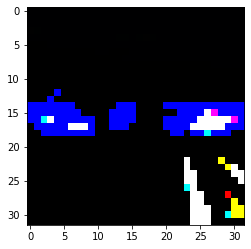

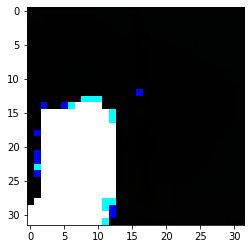

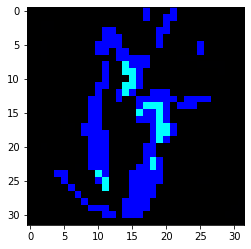

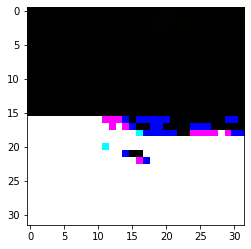

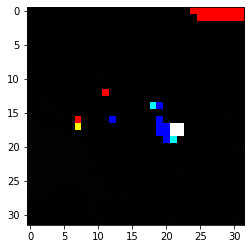

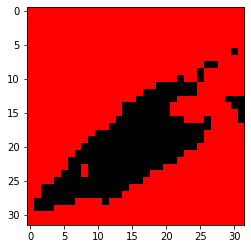

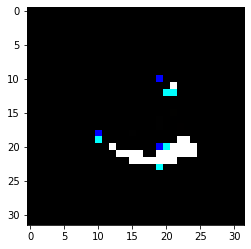

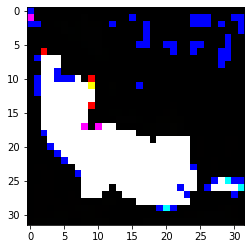

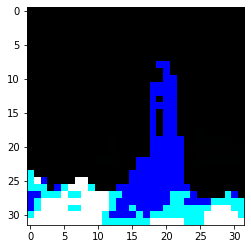

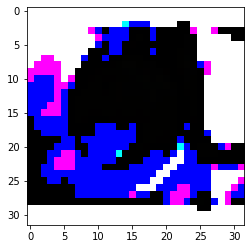

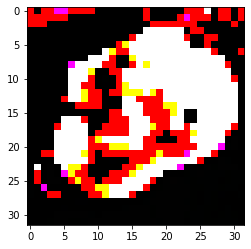

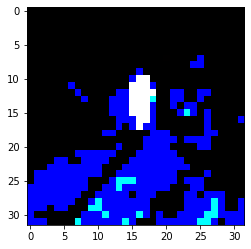

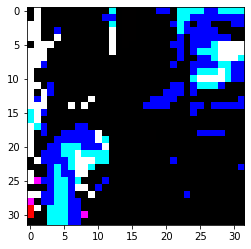

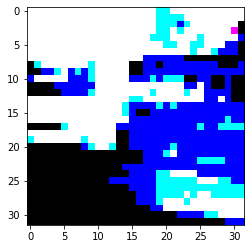

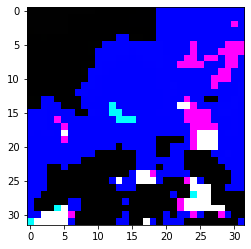

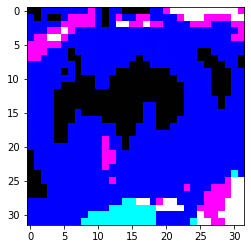

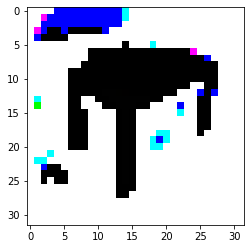

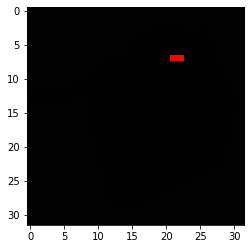

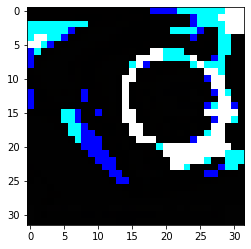

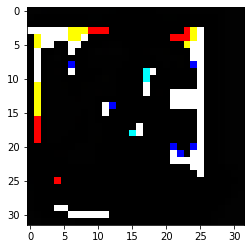

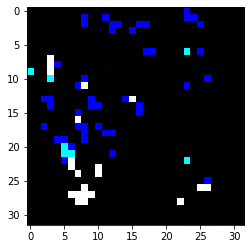

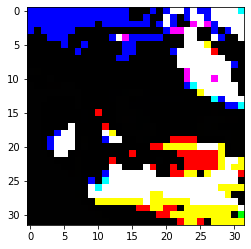

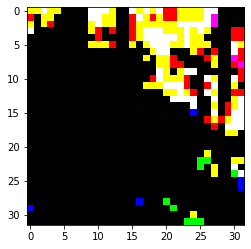

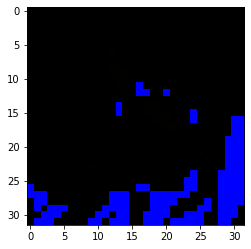

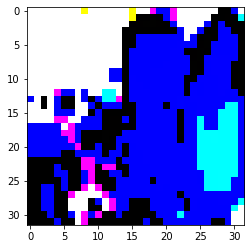

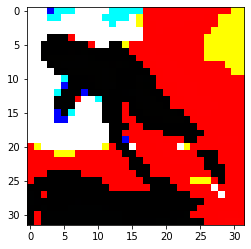

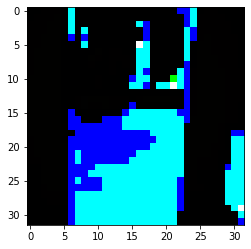

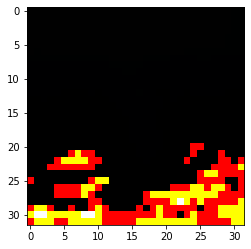

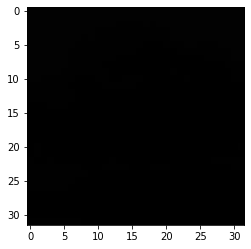

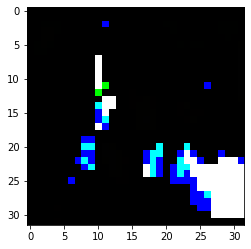

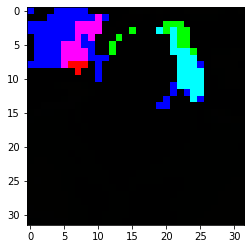

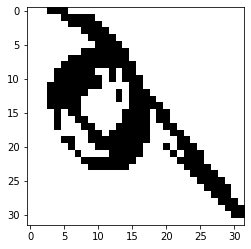

In [17]:
# Show normalised data
if treat_data == "normalize": 
    show_image_classes(x_train, y_train, prefix, "normalised")

In [18]:
# Make target values categorical (one-hot encoded)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

## Neural Network Training

In [19]:
datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=False, 
                                                       samplewise_center=False, 
                                                       featurewise_std_normalization=False, 
                                                       samplewise_std_normalization=False, 
                                                       zca_whitening=False, 
                                                       zca_epsilon=1e-06, 
                                                       rotation_range=0.0, 
                                                       width_shift_range=0.0, 
                                                       height_shift_range=0.0, 
                                                       brightness_range=None, 
                                                       shear_range=0.0, 
                                                       zoom_range=0.0, 
                                                       channel_shift_range=0.0, 
                                                       fill_mode='nearest', 
                                                       cval=0.0, 
                                                       horizontal_flip=False, 
                                                       vertical_flip=False, 
                                                       rescale=None, 
                                                       preprocessing_function=None, 
                                                       data_format=None, 
                                                       validation_split=0.0)

In [20]:
# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [21]:
models = []
model_names = []
input_shape = x_train[0].shape
batch_size=100
epochs = 80

In [22]:
# Create neural network models
models.append(create_MLP_1(input_shape))
model_names.append("MLP_Input_1")

In [23]:
history = []
lr = 0.0001

for model in models:
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(lr=lr),
                  metrics=['accuracy'])

In [24]:
# Fit neural network models to training data
for model_ind, model in enumerate(models):  
    history.append(
      model.fit_generator(
          datagen.flow(x_train, y_train_categorical, batch_size=batch_size),
          steps_per_epoch=len(x_train)/batch_size,
          epochs=epochs,
          verbose=1,
          validation_data = (x_test, y_test_categorical)))
    
    model.save_weights(input_path + "Benchmark_Models/Data/" + prefix + "_" + model_names[model_ind] + ".h5")
    
    print ("Model success")

Epoch 1/80
500/500 [==============================] - 1498s 3s/step - loss: 3.9429 - accuracy: 0.1048 - val_loss: 3.3353 - val_accuracy: 0.2136
Epoch 2/80
500/500 [==============================] - 1431s 3s/step - loss: 3.2741 - accuracy: 0.2121 - val_loss: 2.8342 - val_accuracy: 0.3078
Epoch 3/80
500/500 [==============================] - 4376s 9s/step - loss: 2.9328 - accuracy: 0.2777 - val_loss: 2.5975 - val_accuracy: 0.3533
Epoch 4/80
500/500 [==============================] - 1419s 3s/step - loss: 2.7181 - accuracy: 0.3218 - val_loss: 2.4171 - val_accuracy: 0.3908
Epoch 5/80
500/500 [==============================] - 3178s 6s/step - loss: 2.5510 - accuracy: 0.3550 - val_loss: 2.2932 - val_accuracy: 0.4137
Epoch 6/80
500/500 [==============================] - 1441s 3s/step - loss: 2.4193 - accuracy: 0.3848 - val_loss: 2.2246 - val_accuracy: 0.4300
Epoch 7/80
500/500 [==============================] - 1442s 3s/step - loss: 2.3023 - accuracy: 0.4077 - val_loss: 2.1441 - val_accuracy:

KeyboardInterrupt: 